### Imports

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

comp='shannon'
import sys  # update paths

#sys.path.append('../../../')
#sys.path.append('../../')
#sys.path.append('../')

import numpy as np 
import matplotlib.pyplot as plt
import copy

import scresonators.measurement.handy as hy
from scresonators.fit_resonator.ana_resonator import ResonatorData, ResonatorFitter, ResonatorAnalyzer, ResonatorPlotter
import scresonators.fit_resonator.ana_tls as ana_tls
import seaborn as sns

colors = ['#4053d3', '#b51d14', '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(colors)
#G:\Shared drives\SLab\JJ_fab\Coherence Sample\022125_Resonator\data

if comp=='shannon':
    pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'
elif comp=='bf1':
    pth_base='G:/'

folder = 'My Drive/Projects/Materials/'
#folder = 'Shared drives/SLab/JJ_fab/Coherence Sample/'
pth = pth_base+folder
img_pth = pth+'Outputs/Resonators/'

meas = 'full_qubitB'
#meas = 'silicon-scalinq-0'
#meas = 'silicon-waffle-1108'
#meas = 'silicon-waffle-phase'
meas = 'sil3b_vna2'
meas = 'sil4b2'

ModuleNotFoundError: No module named 'scresonators'

In [3]:
import yaml

with open('resonator_meas.yaml', 'r') as file:
    sample_dict = yaml.safe_load(file)

matching_keys = [key for key, items in sample_dict.items() for item in items['meas'] if item == meas]
sample = matching_keys[0] if matching_keys else None

ind = sample_dict[sample]['meas'].index(meas)
print(ind)
# data_pth = pth_base+folder+'Data/'+sample_dict[sample]['pth']
params = sample_dict[sample]

data_pth = pth_base+folder+'Data/'+params['pth'][ind]
#data_pth = pth_base+folder+params['pth'][ind]
img_name = params['pth'][ind][0:-1] +params['meas'][ind]

1


In [4]:
params['temp']=0.04 
if 'slope' in params: 
    slope=params['slope'][ind]
else: 
    slope=0

## Sweep power/temp, plot results

### Run sweep 

Resonator frequency: Counter({6016000000: 17, 7017700000: 17, 6349100000: 17, 6707000000: 17, 7537300000: 16, 7145000000: 16, 8040500000: 16})
Resonator frequency: Counter({6016000000: 17, 7017700000: 17, 6349100000: 17, 6707000000: 17, 7537300000: 16, 7145000000: 16, 8040500000: 16})
Files sorted by power: ['res_6016000000_0dbm.h5', 'res_6016000000_-5dbm.h5', 'res_6016000000_-10dbm.h5', 'res_6016000000_-15dbm.h5', 'res_6016000000_-20dbm.h5', 'res_6016000000_-25dbm.h5', 'res_6016000000_-30dbm.h5', 'res_6016000000_-35dbm.h5', 'res_6016000000_-40dbm.h5', 'res_6016000000_-45dbm.h5', 'res_6016000000_-50dbm.h5', 'res_6016000000_-55dbm.h5', 'res_6016000000_-60dbm.h5', 'res_6016000000_-65dbm.h5', 'res_6016000000_-70dbm.h5', 'res_6016000000_-75dbm.h5', 'res_6016000000_-80dbm.h5']
Files sorted by power: ['res_6349100000_0dbm.h5', 'res_6349100000_-5dbm.h5', 'res_6349100000_-10dbm.h5', 'res_6349100000_-15dbm.h5', 'res_6349100000_-20dbm.h5', 'res_6349100000_-25dbm.h5', 'res_6349100000_-30dbm.h5', 

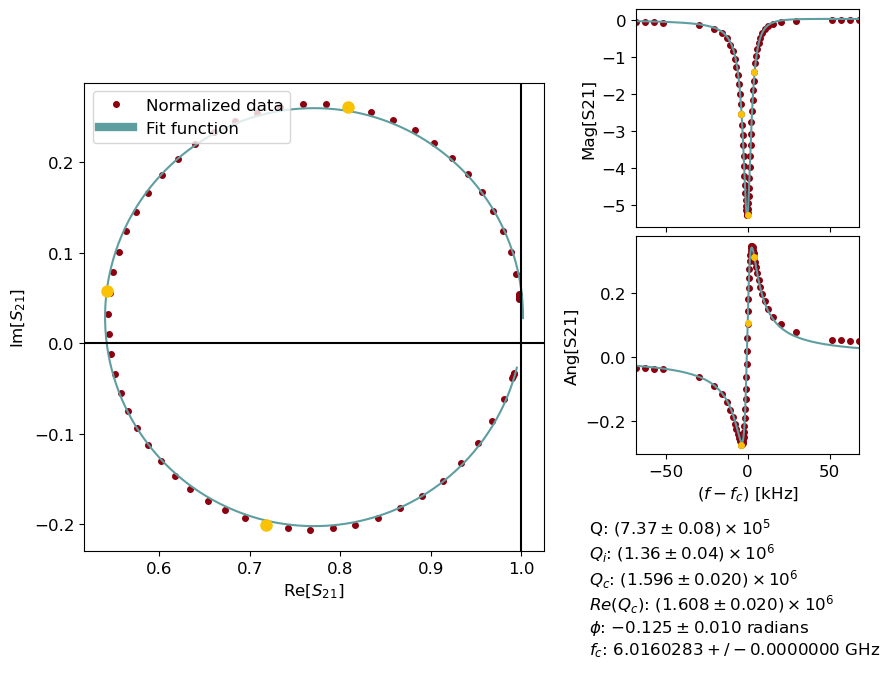

-5.0


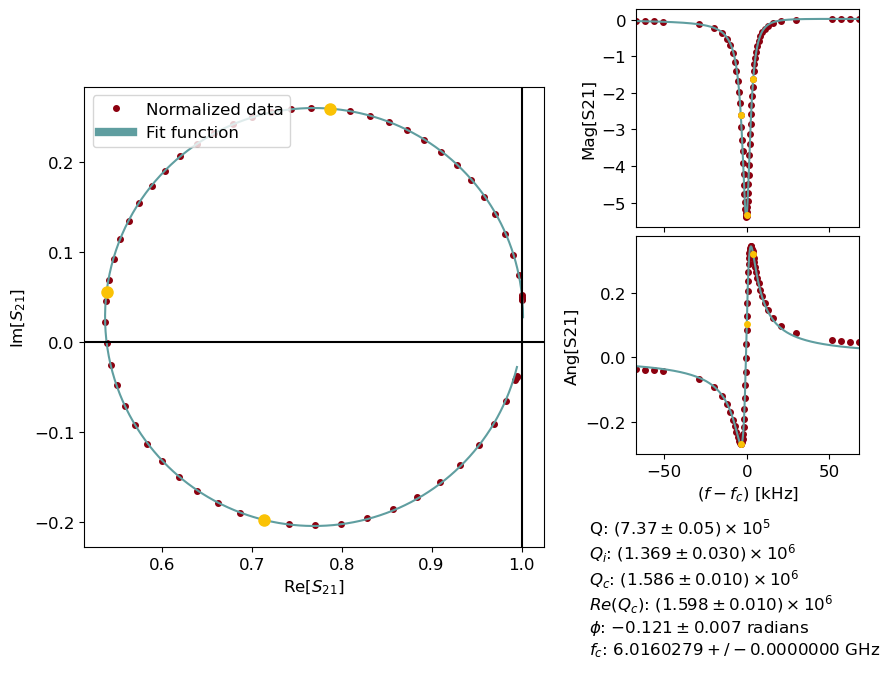

-10.0


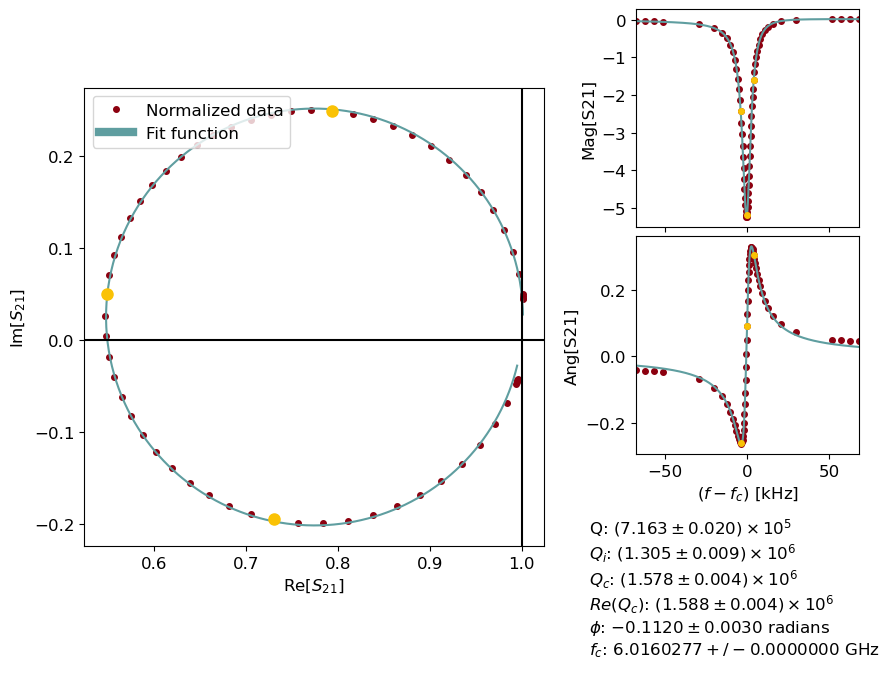

-15.0


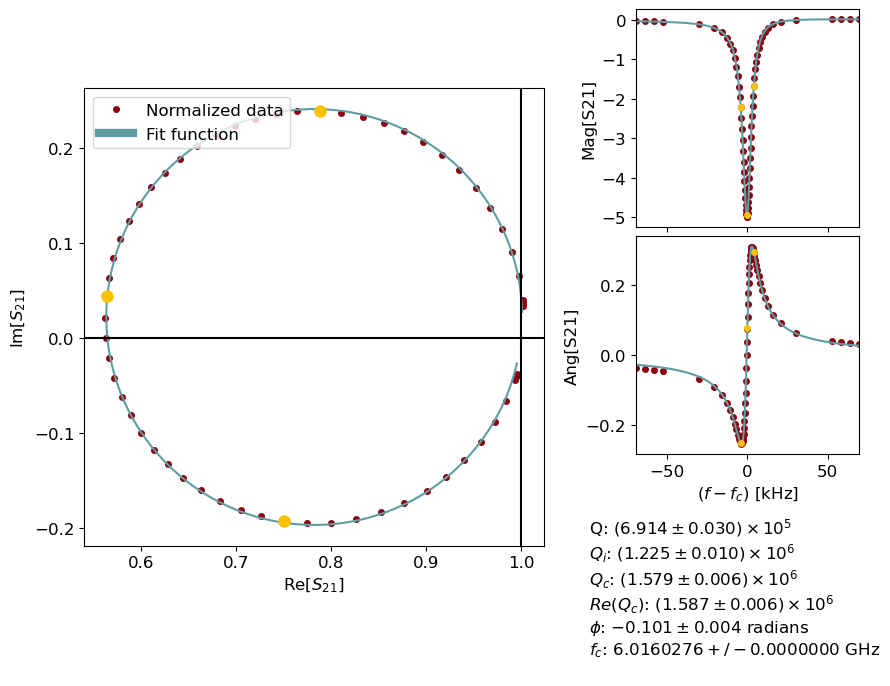

-20.0


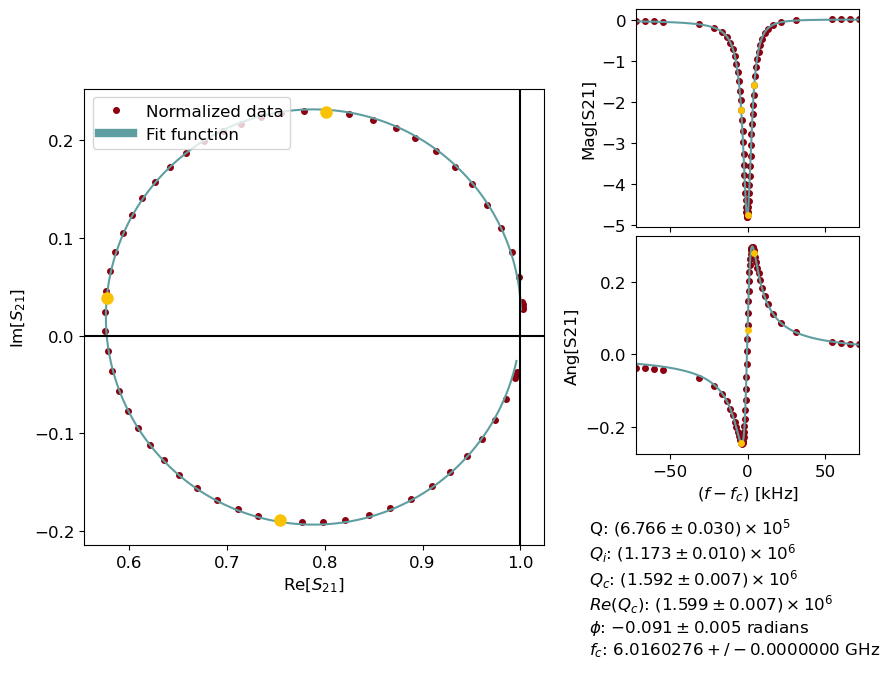

-25.0


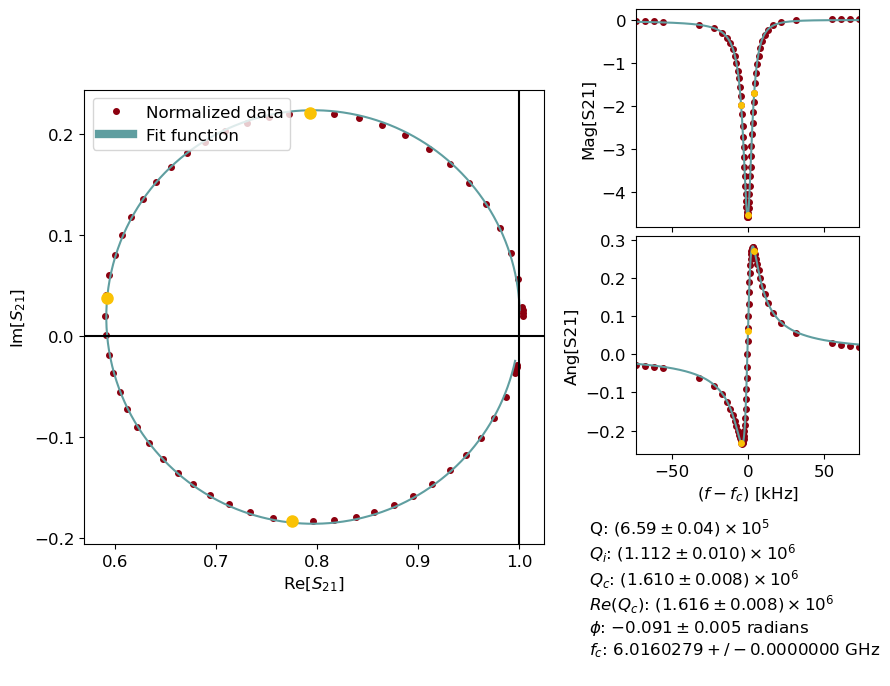

-30.0


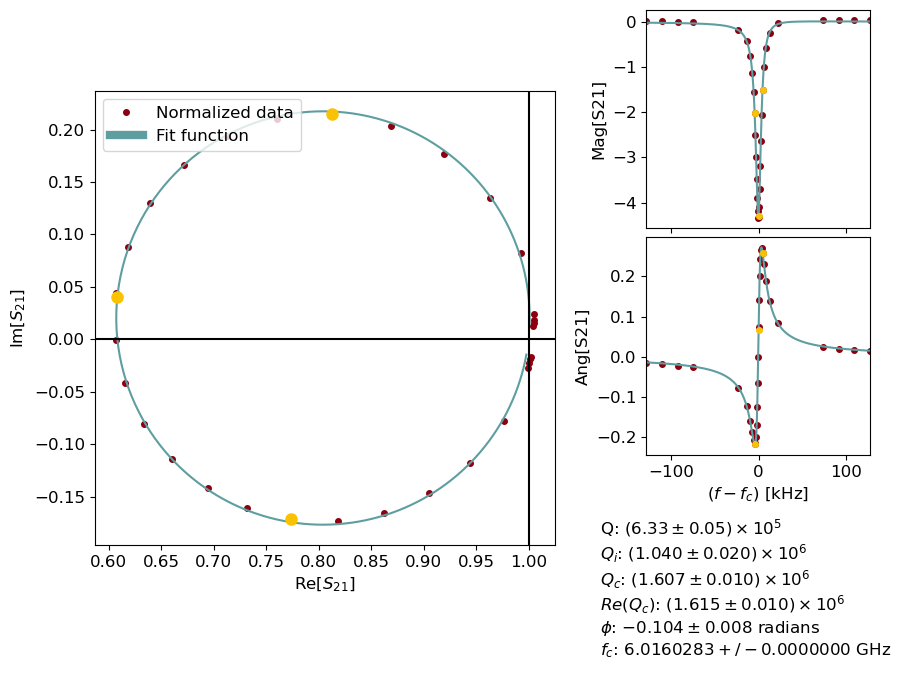

-35.0


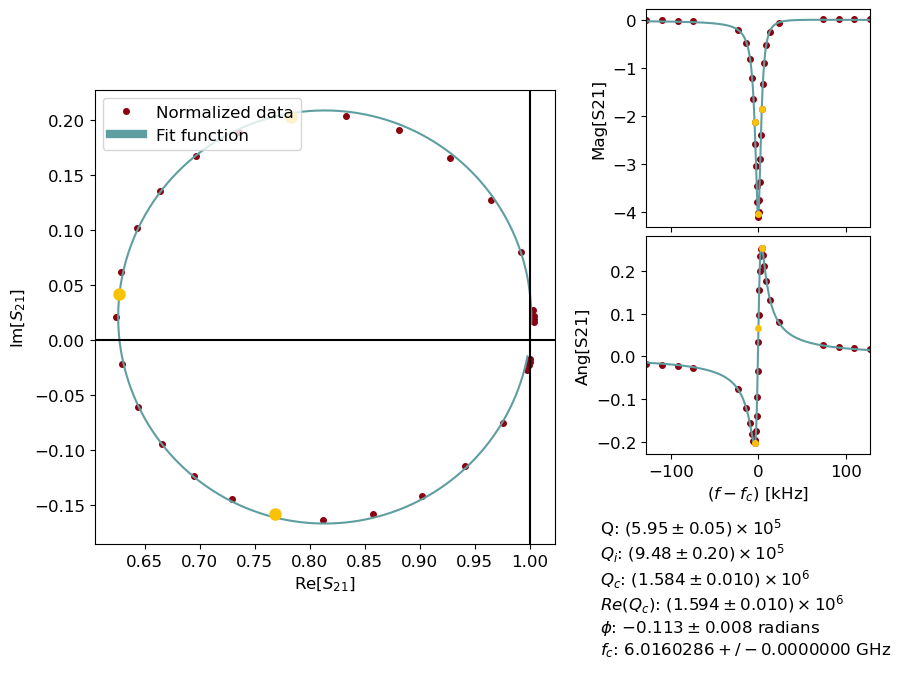

-40.0


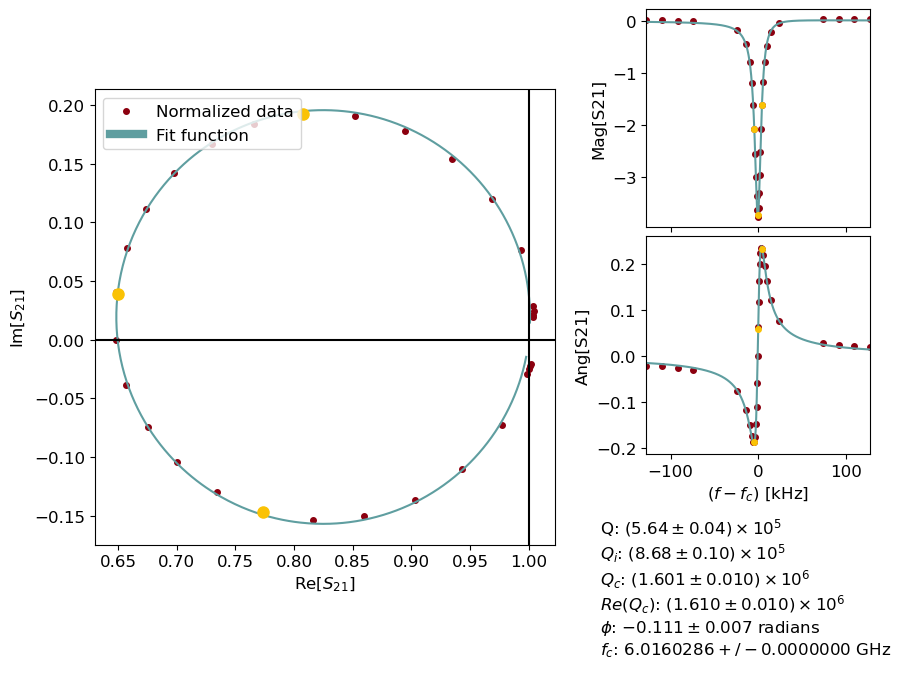

-45.0


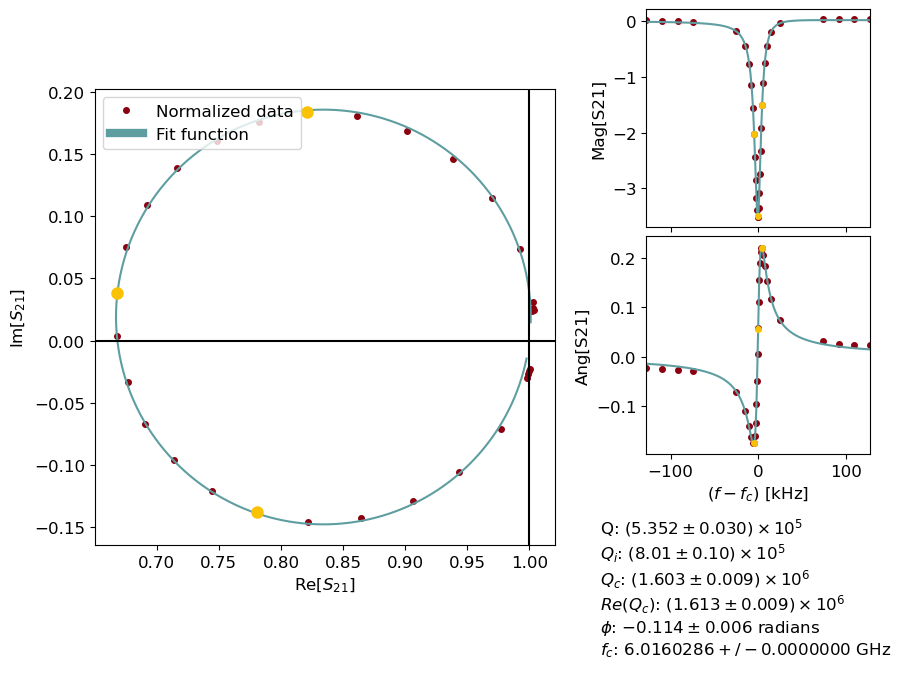

-50.0


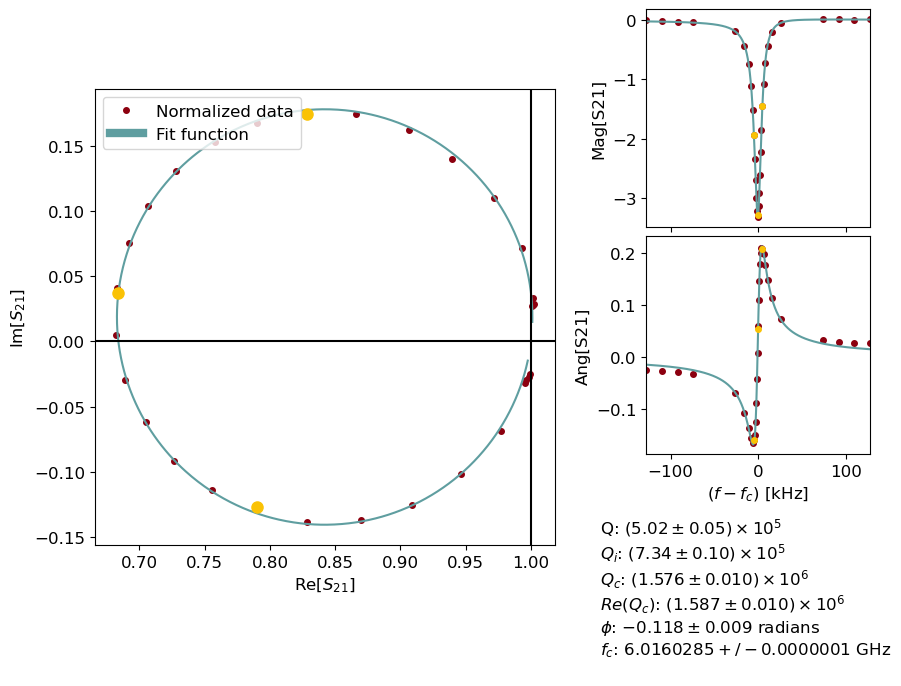

-55.0


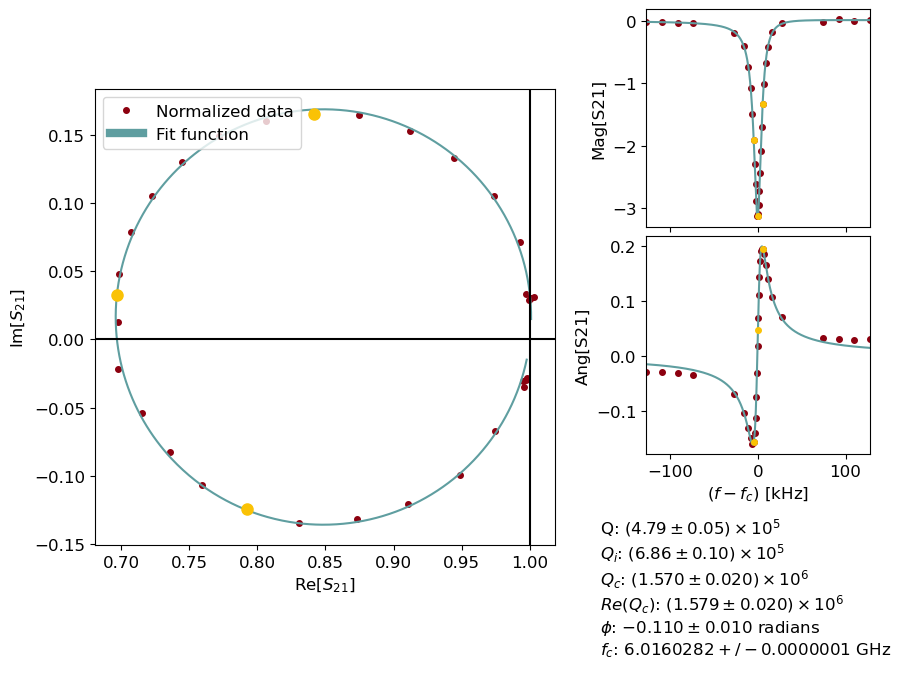

-60.0


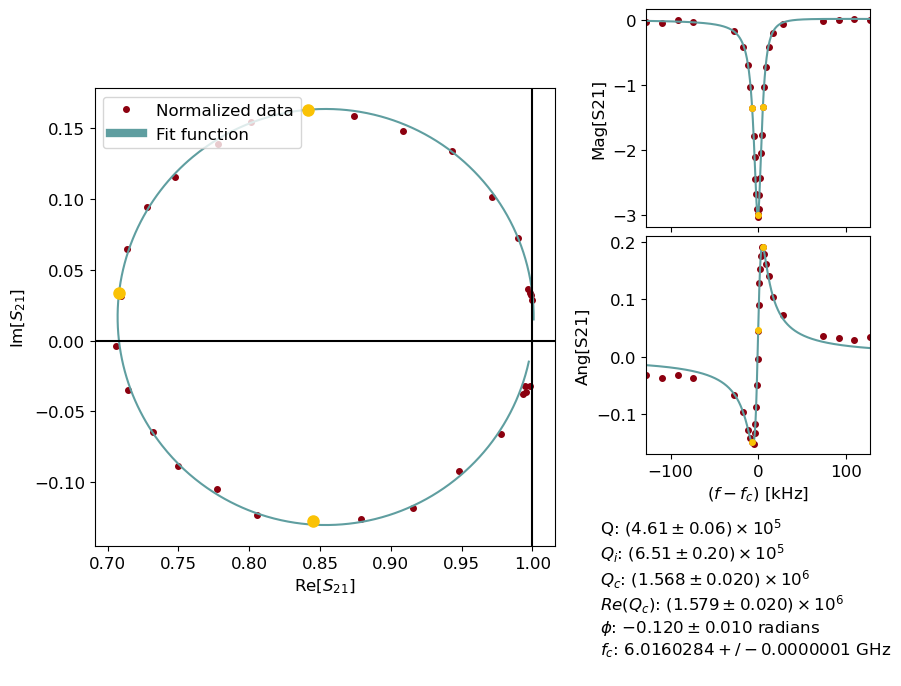

-65.0


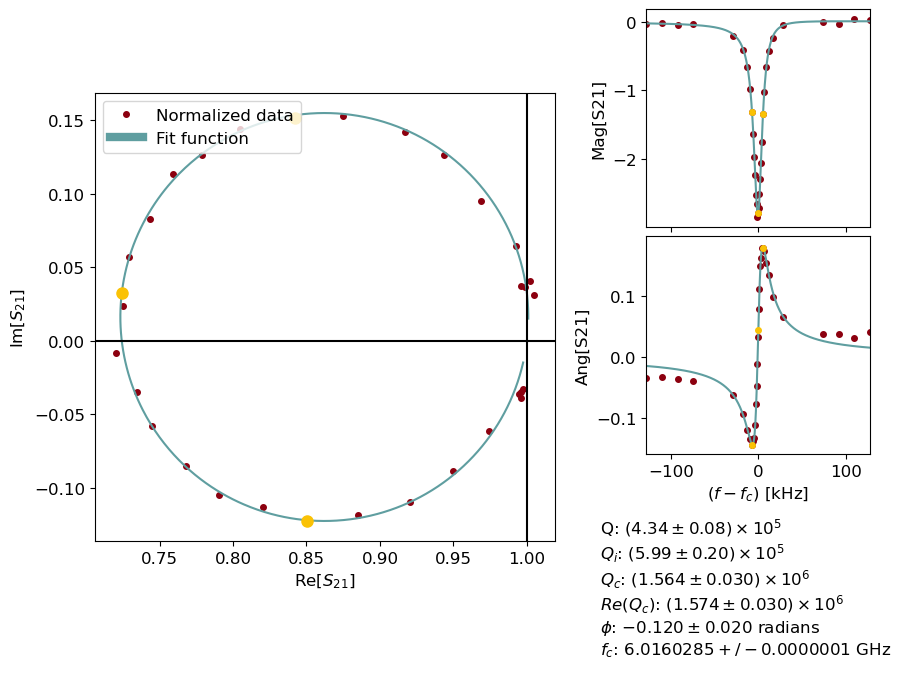

-70.0


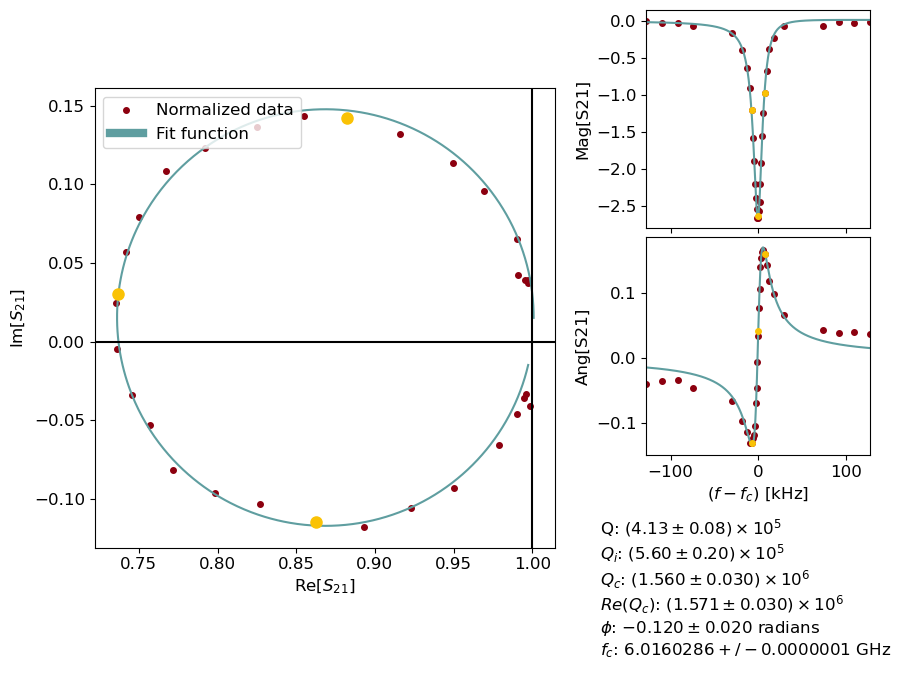

-75.0


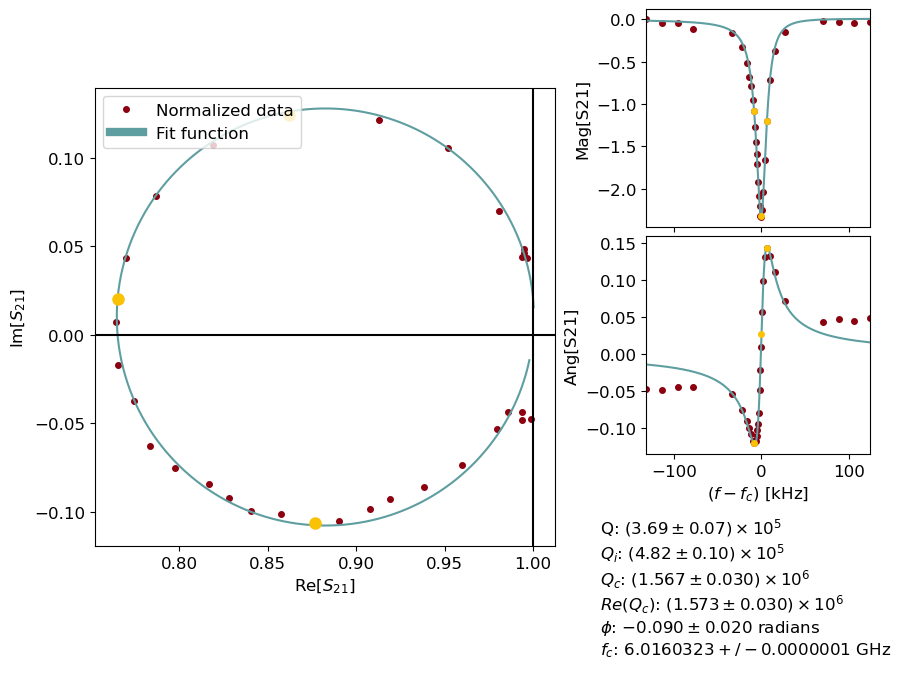

-80.0


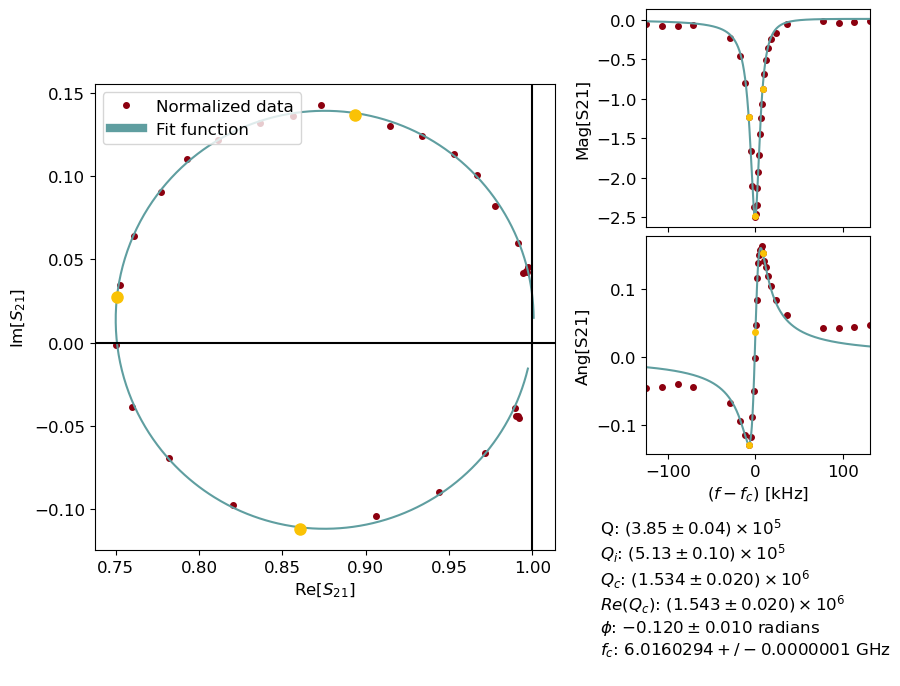

Time elapsed: 63.93023204803467
0.0


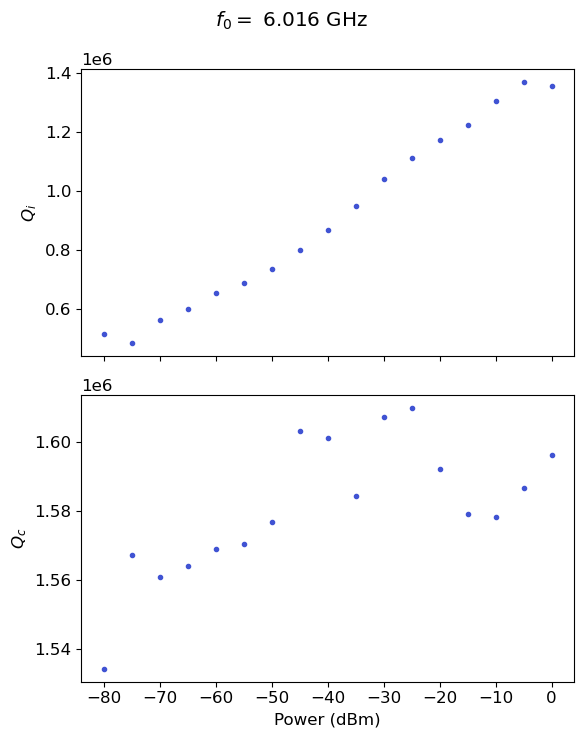

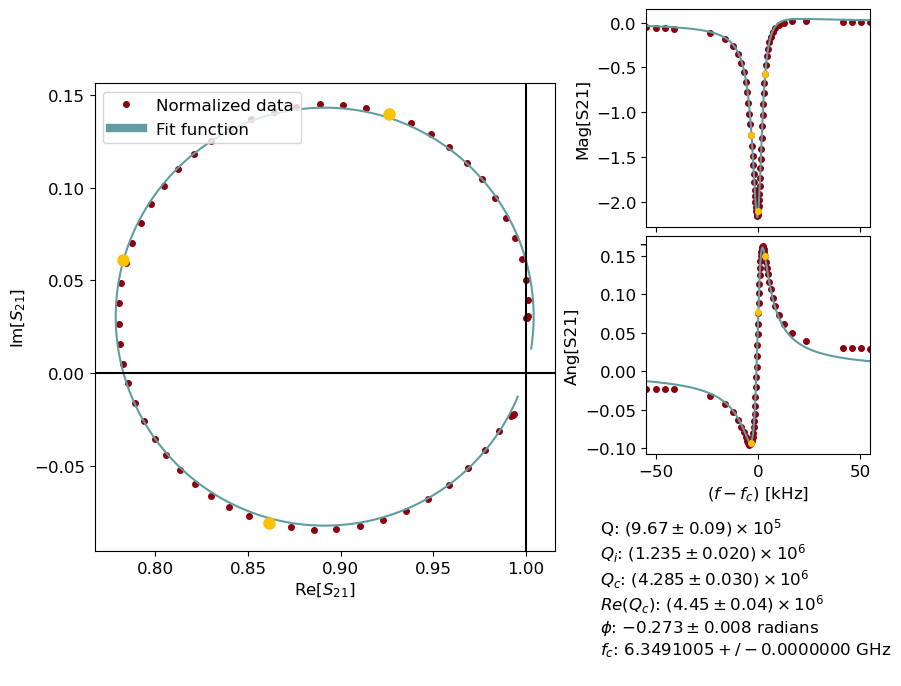

-5.0


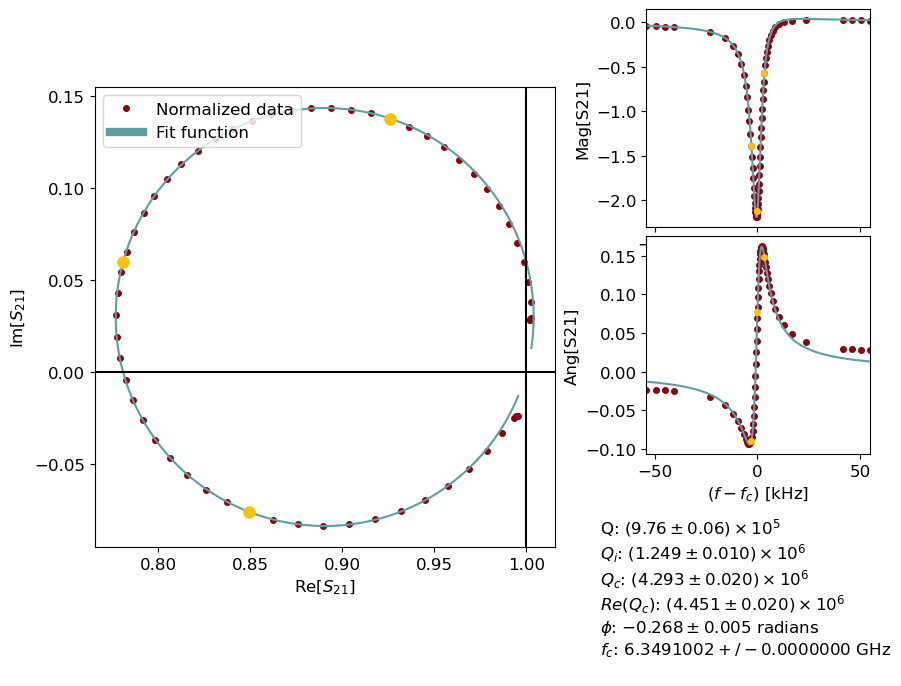

-10.0


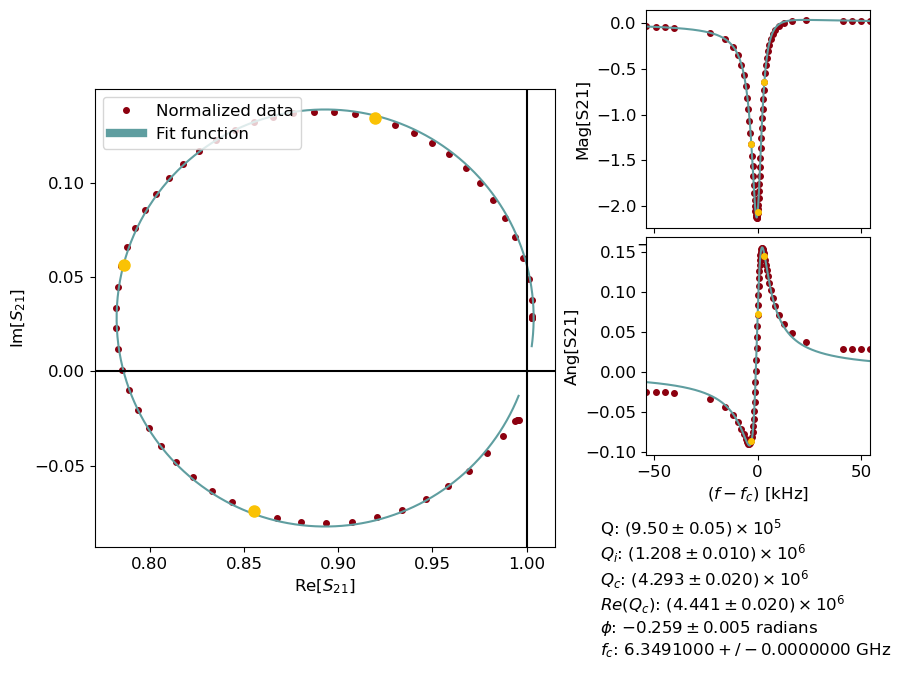

-15.0


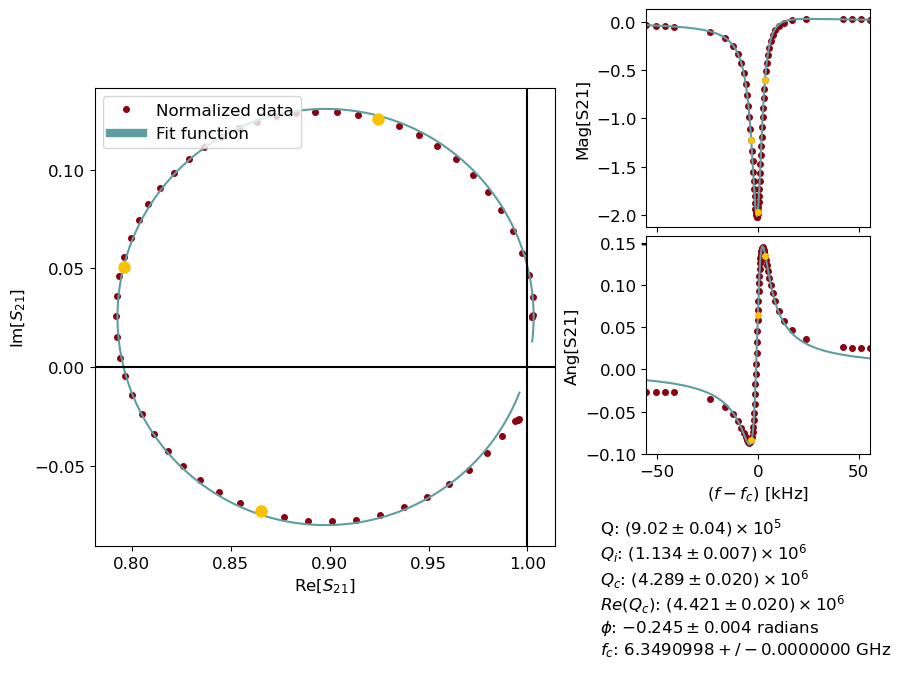

-20.0


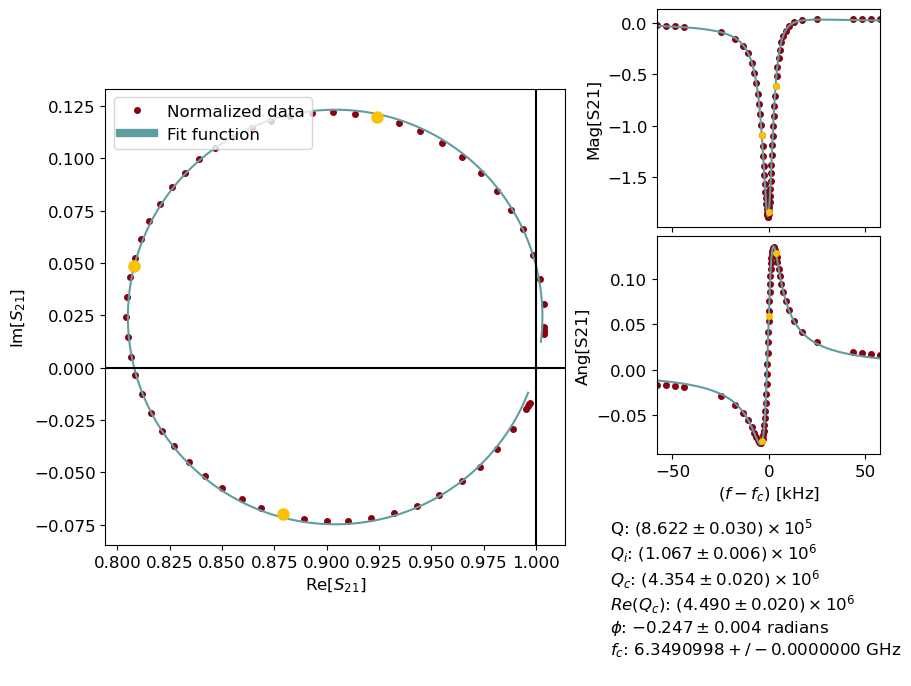

-25.0


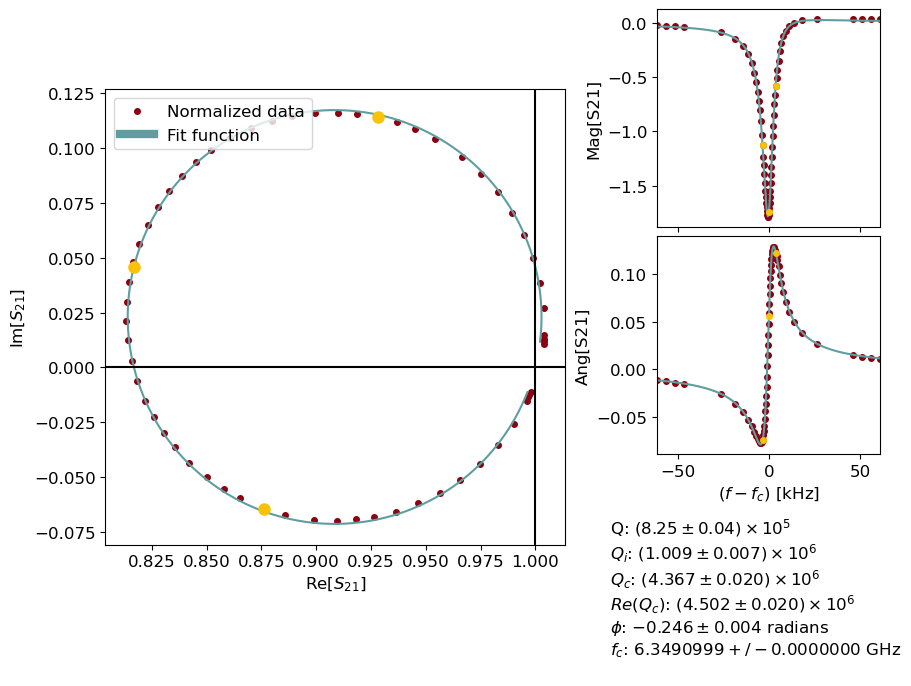

-30.0


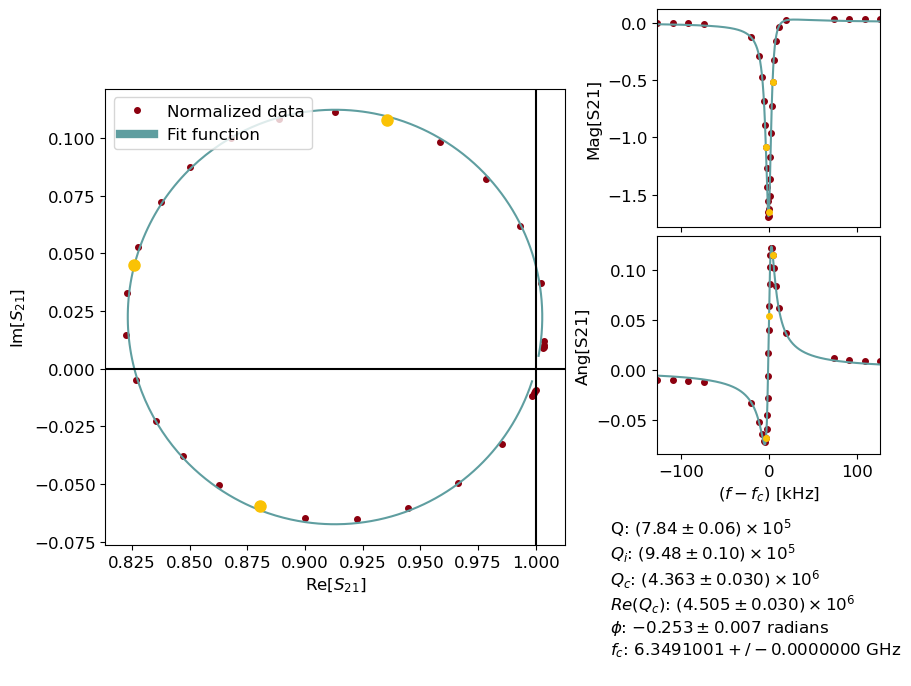

-35.0


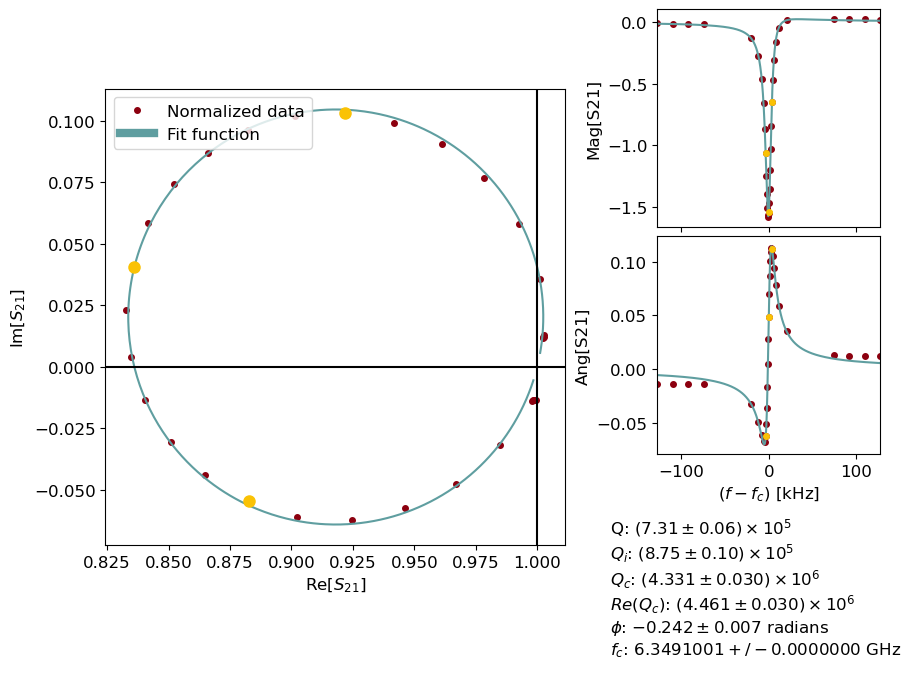

-40.0


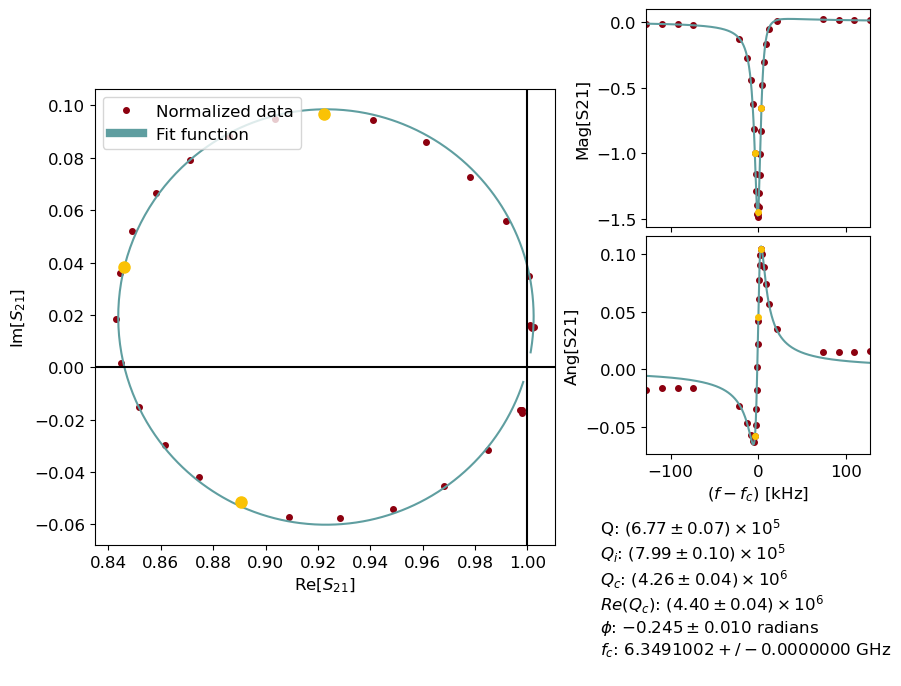

-45.0


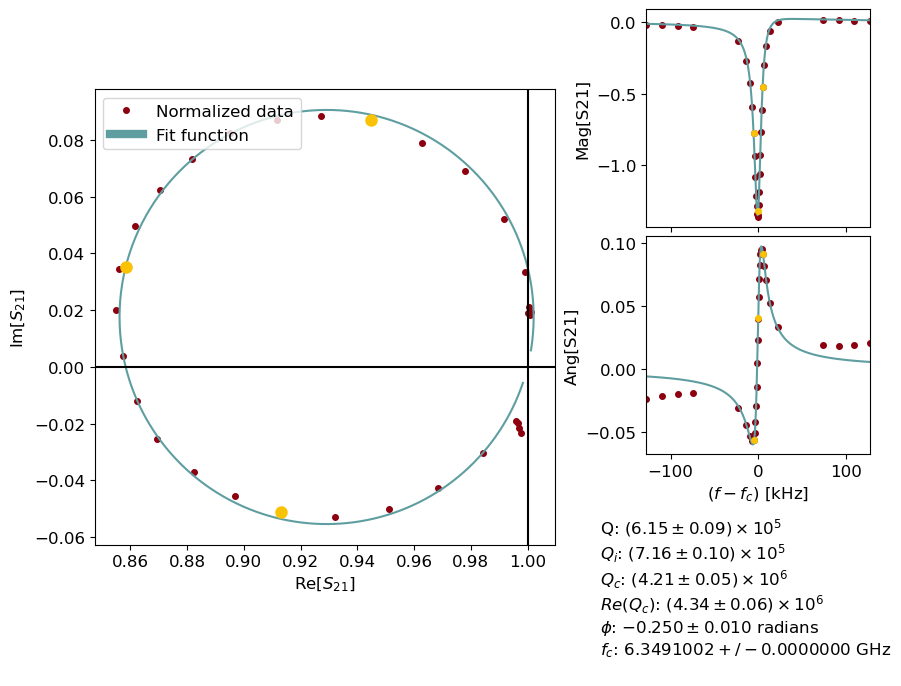

-50.0


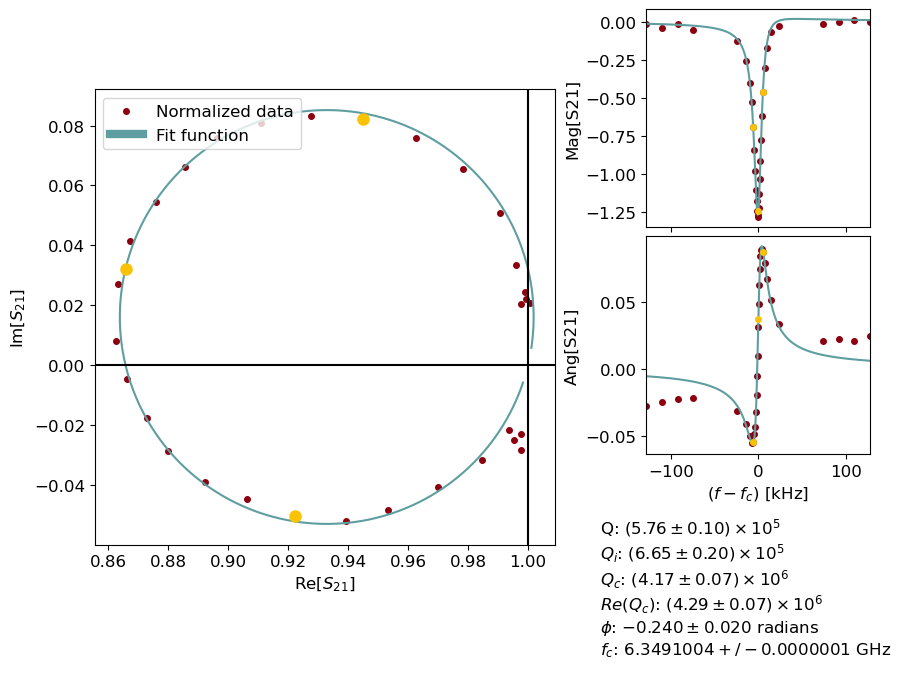

-55.0


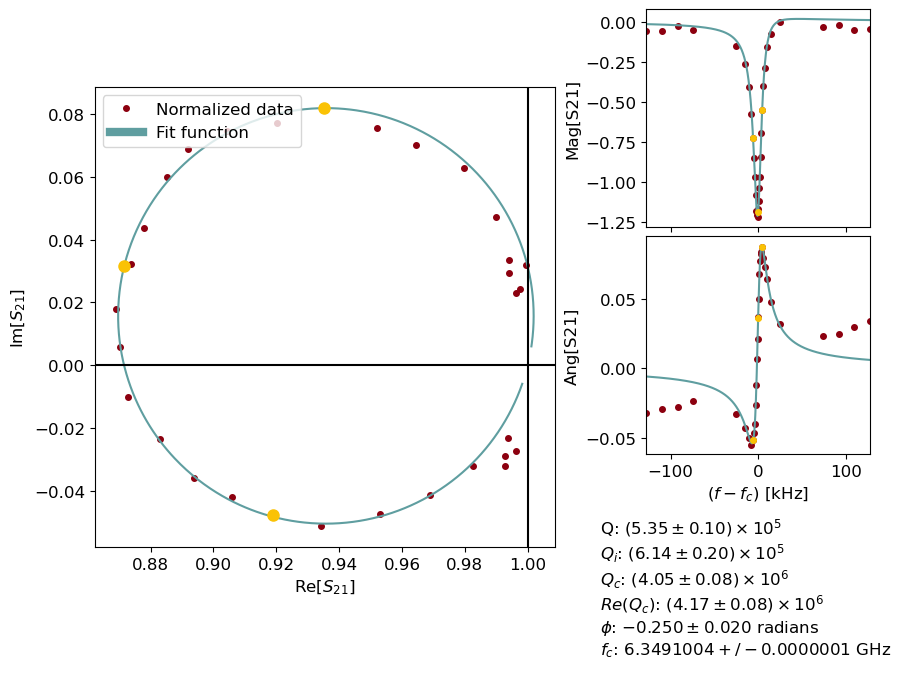

-60.0


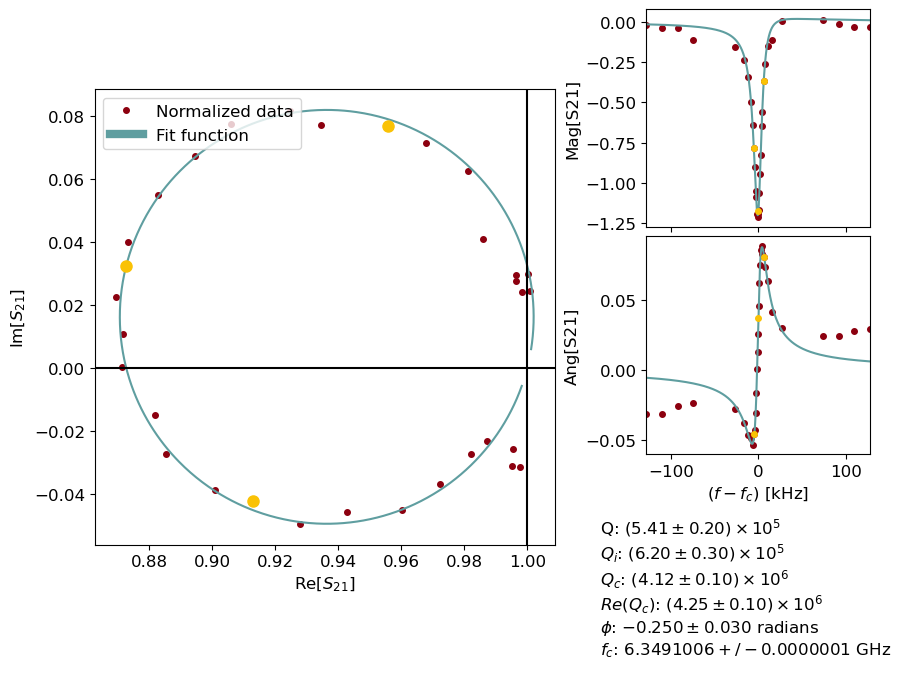

-65.0


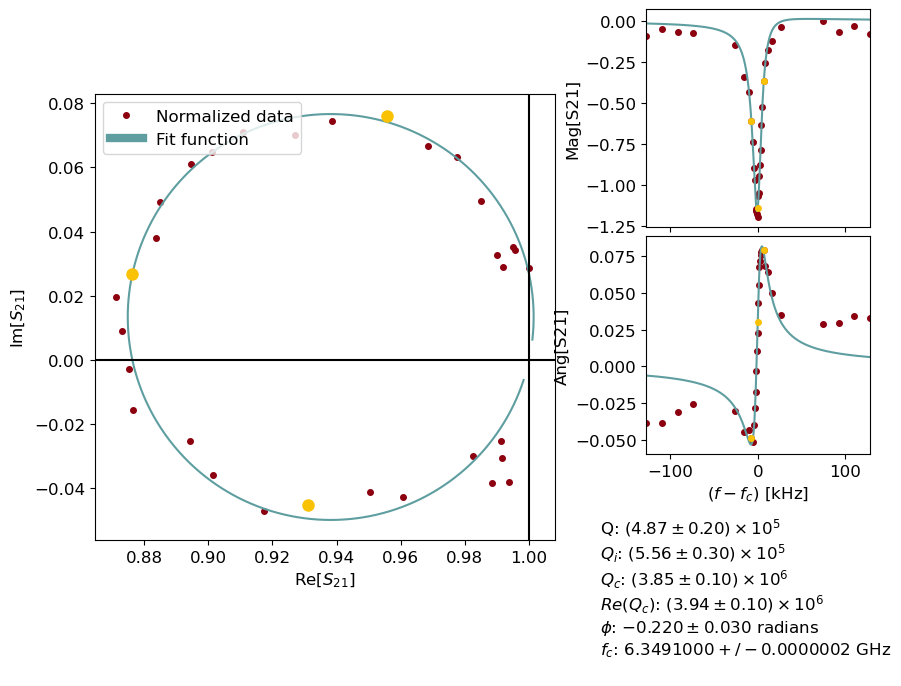

-70.0


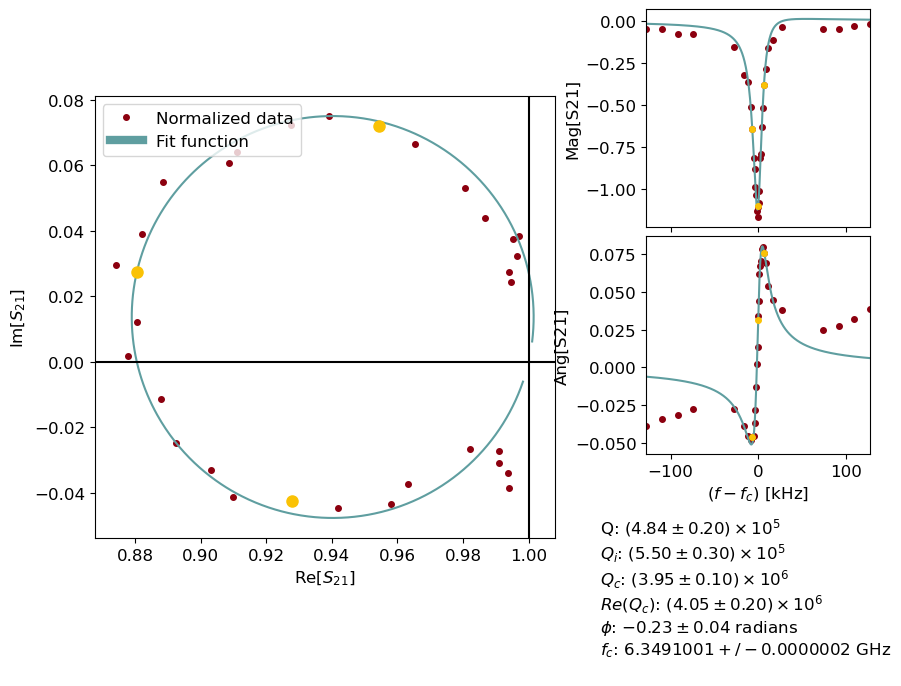

-75.0


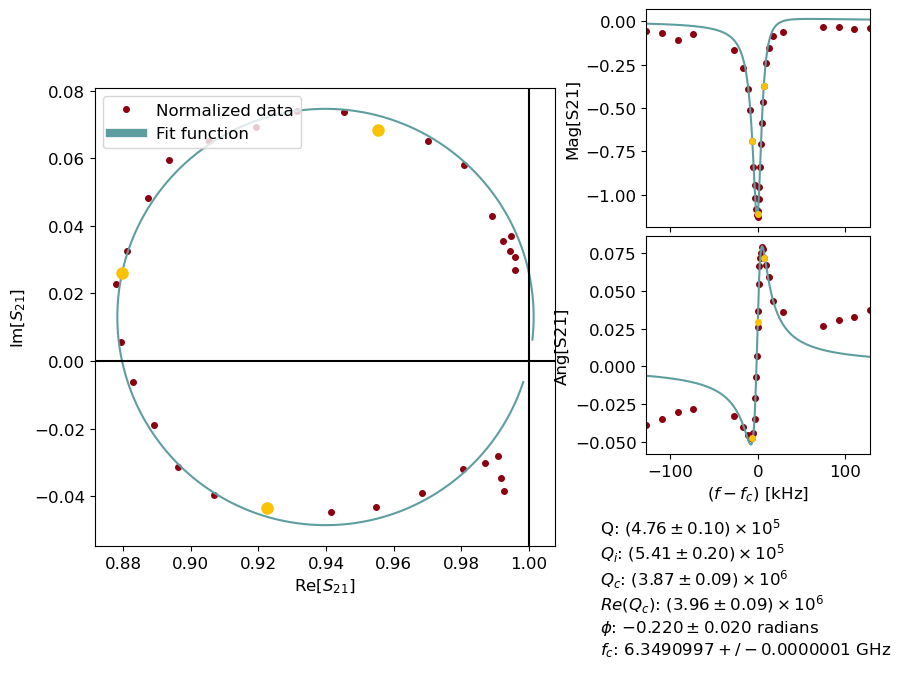

-80.0


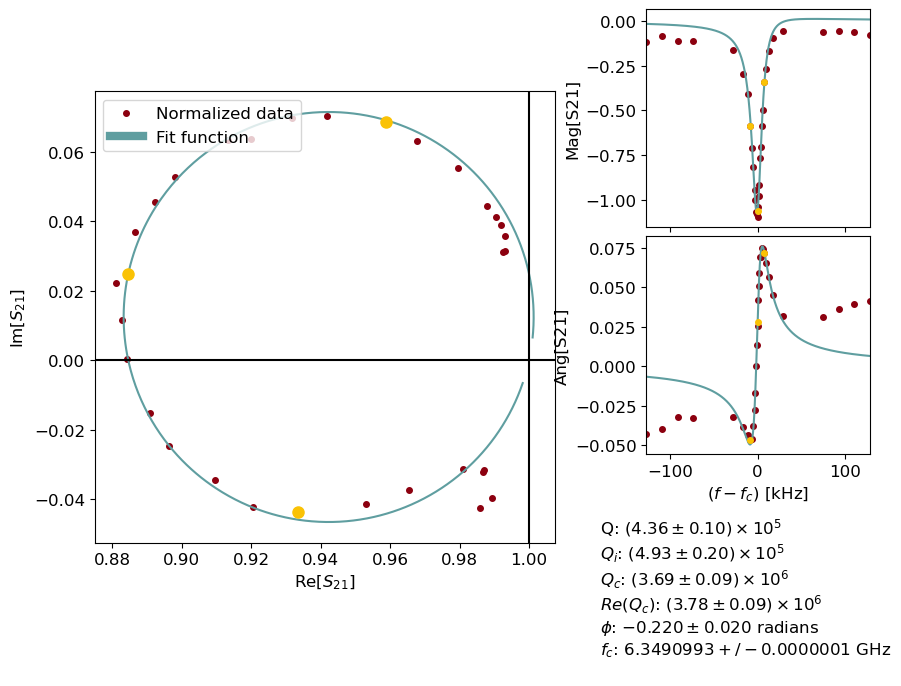

Time elapsed: 133.34226298332214
0.0


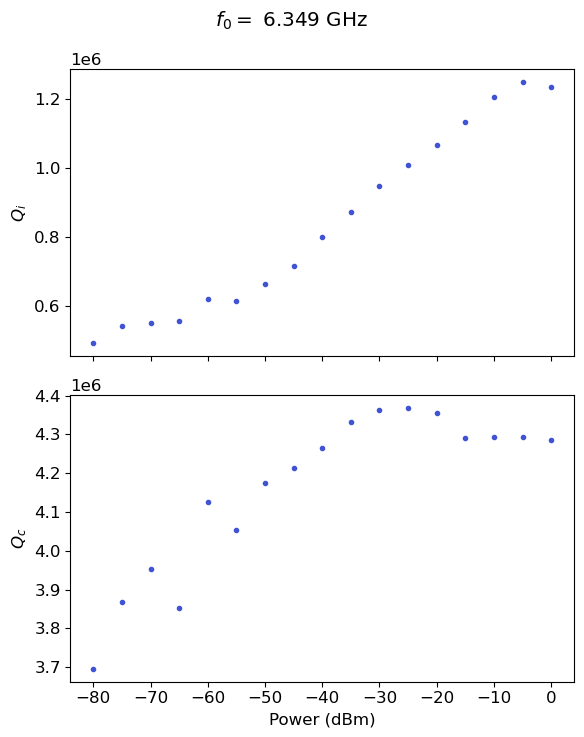

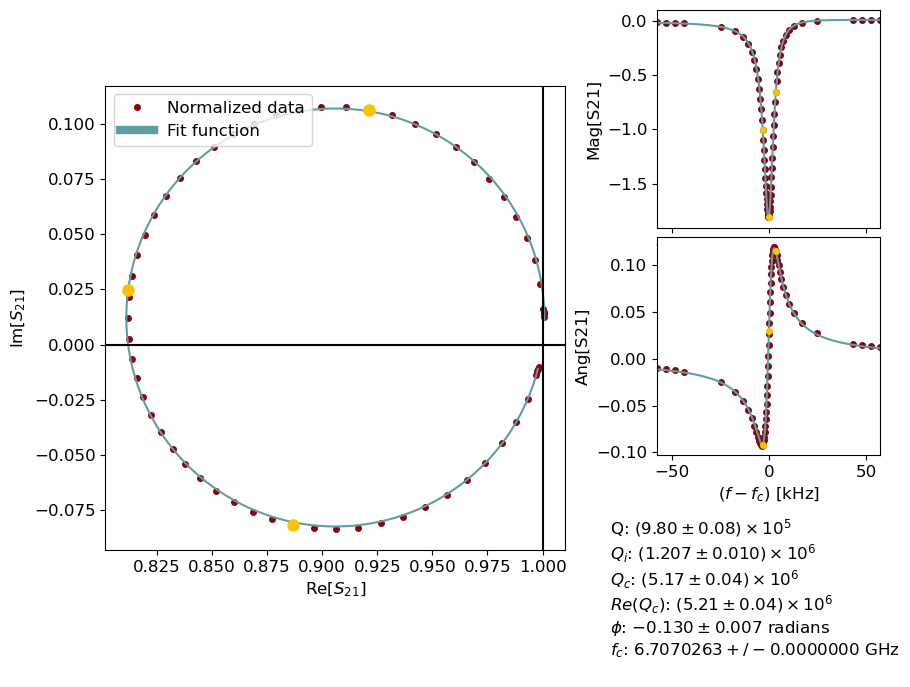

-5.0


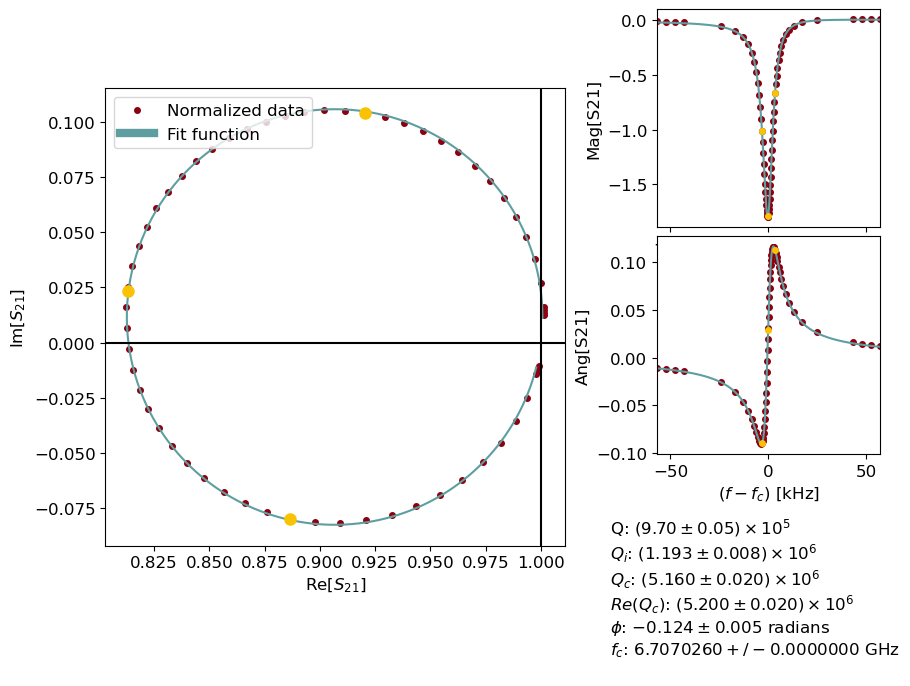

-10.0


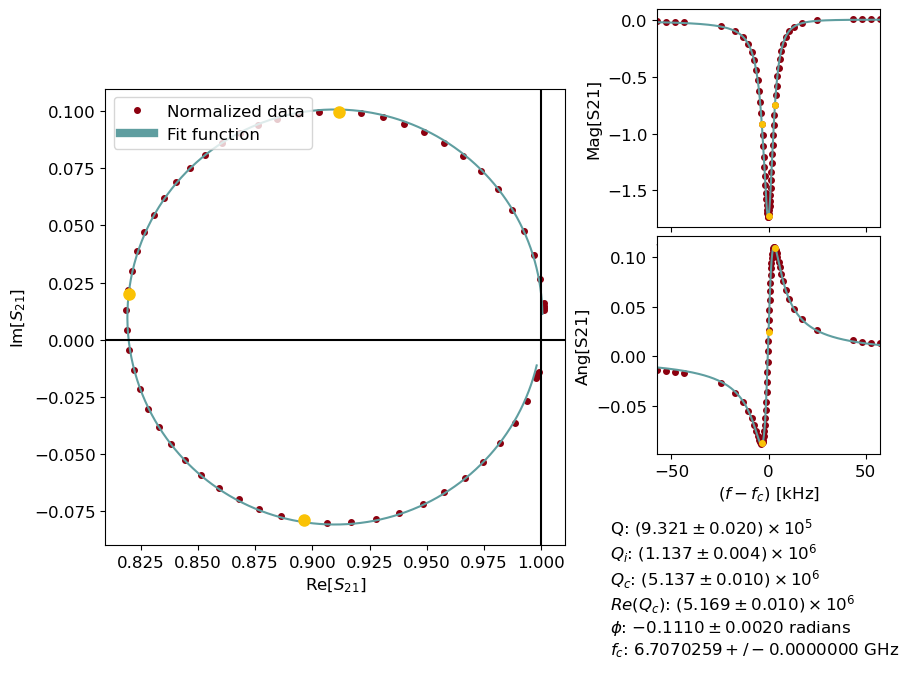

-15.0


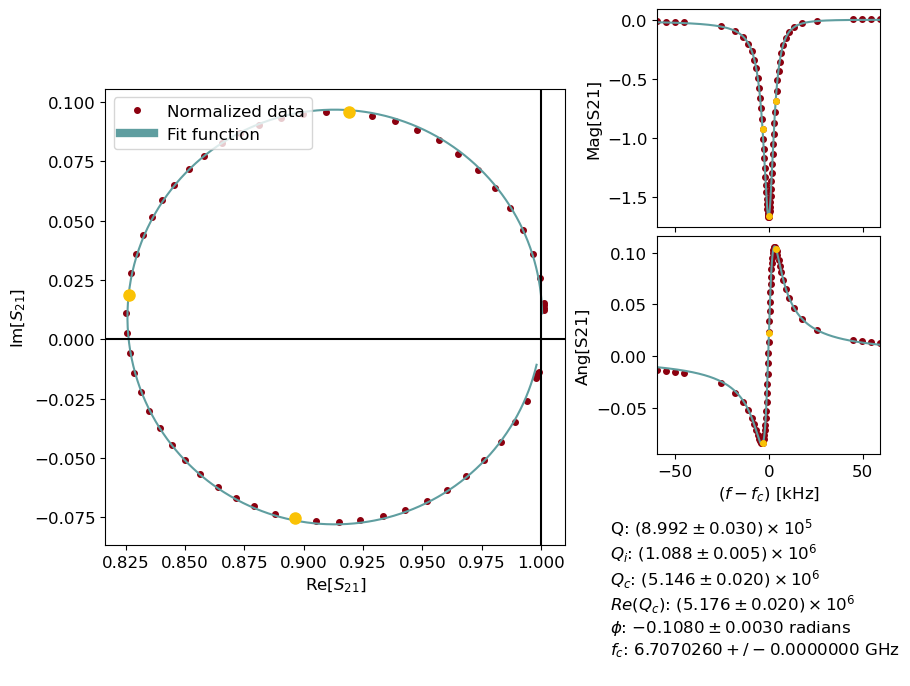

-20.0


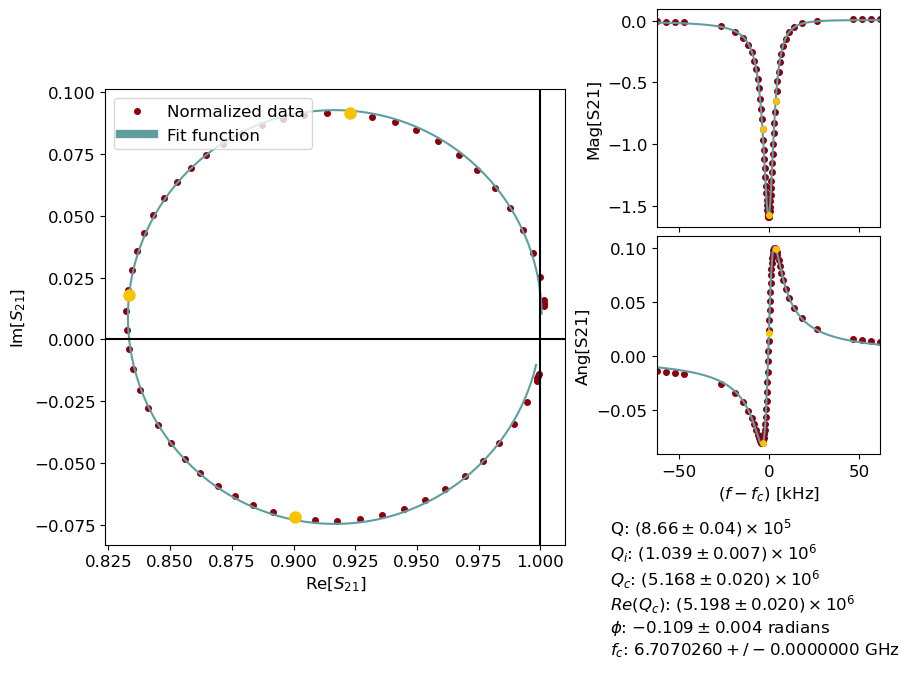

-25.0


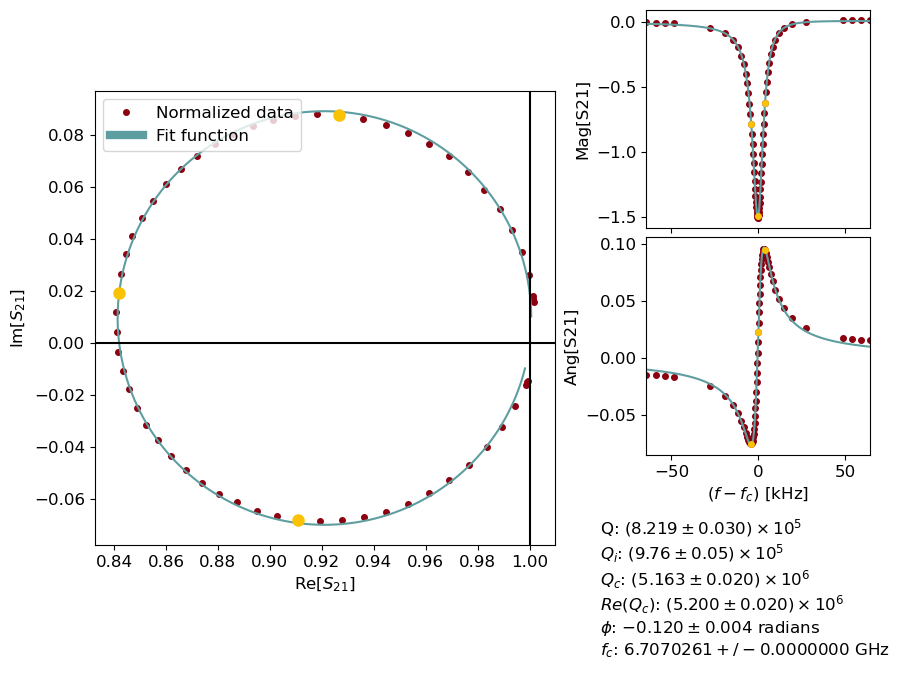

-30.0


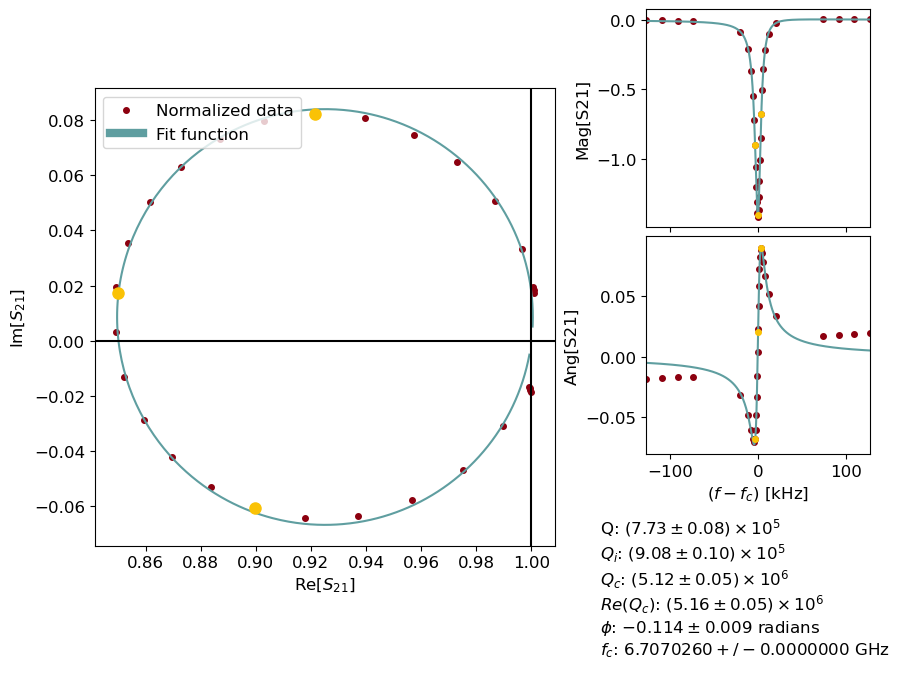

-35.0


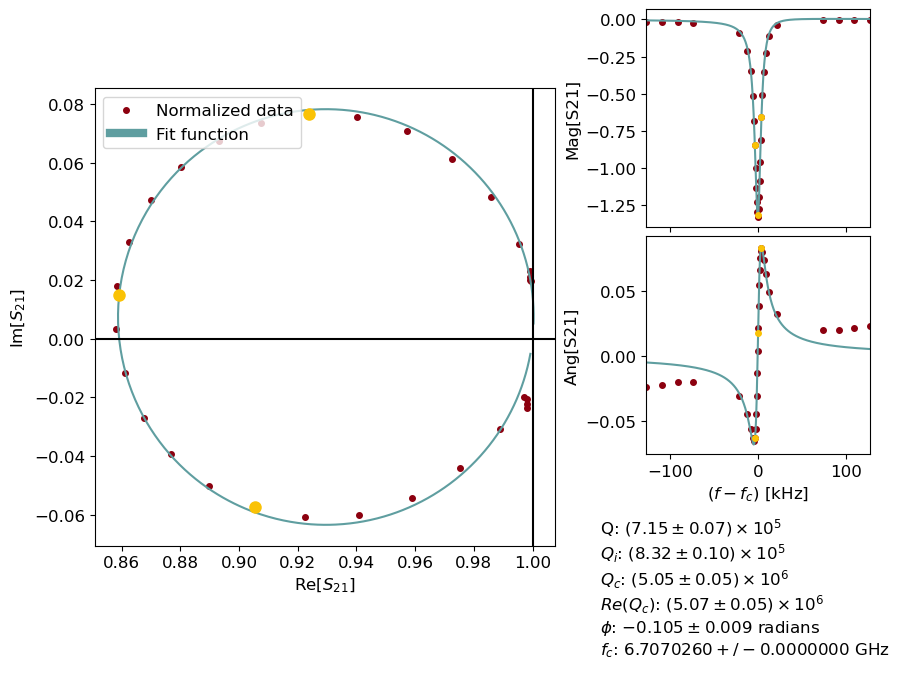

-40.0


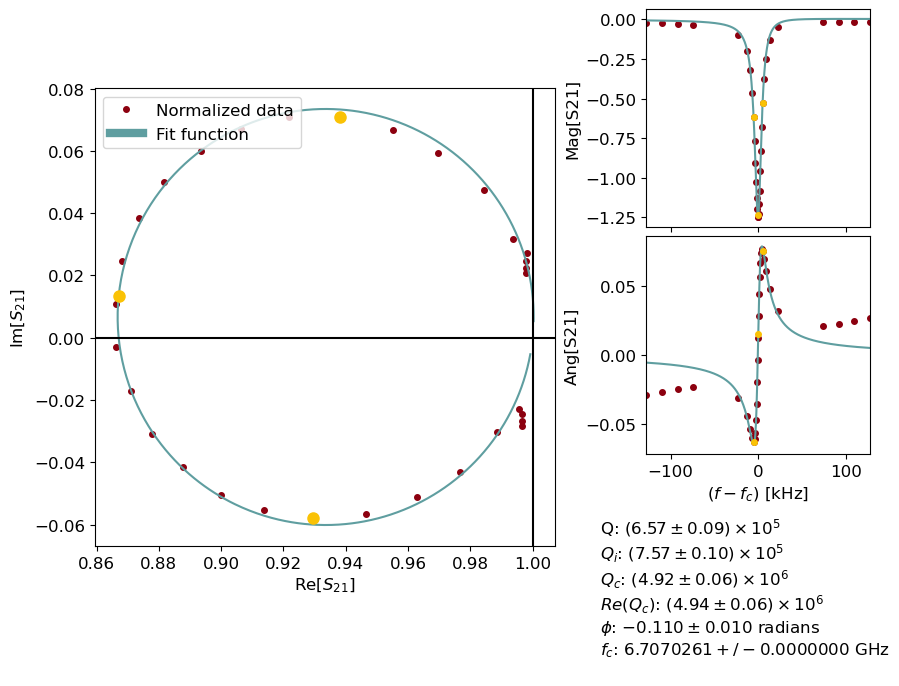

-45.0


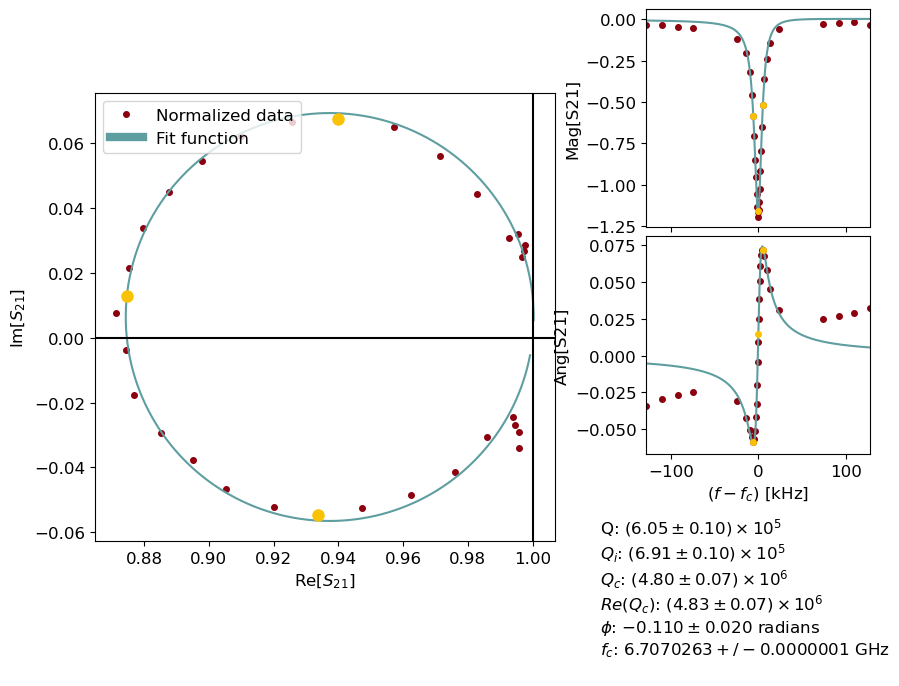

-50.0


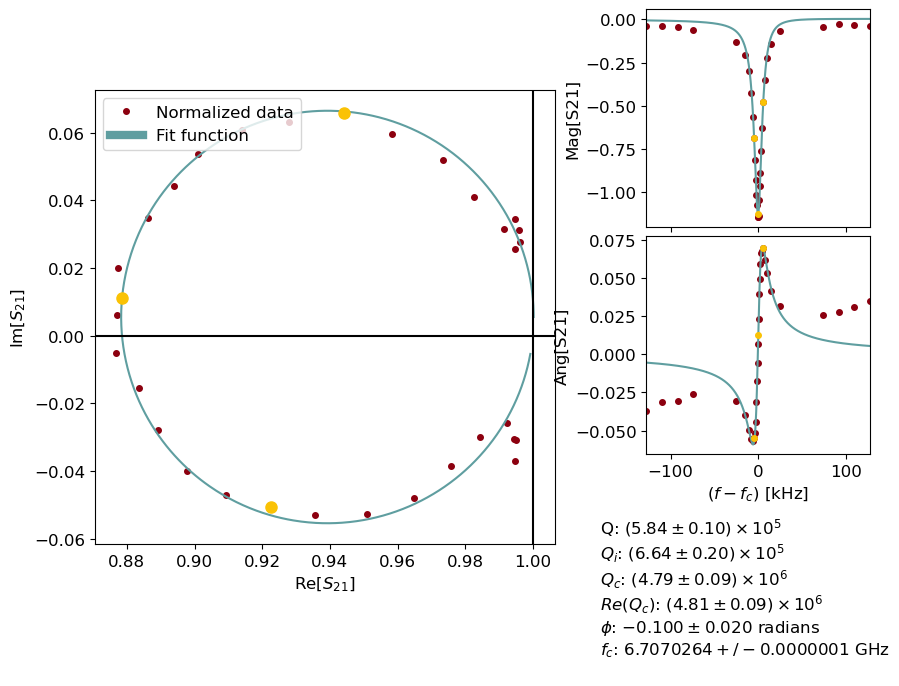

-55.0


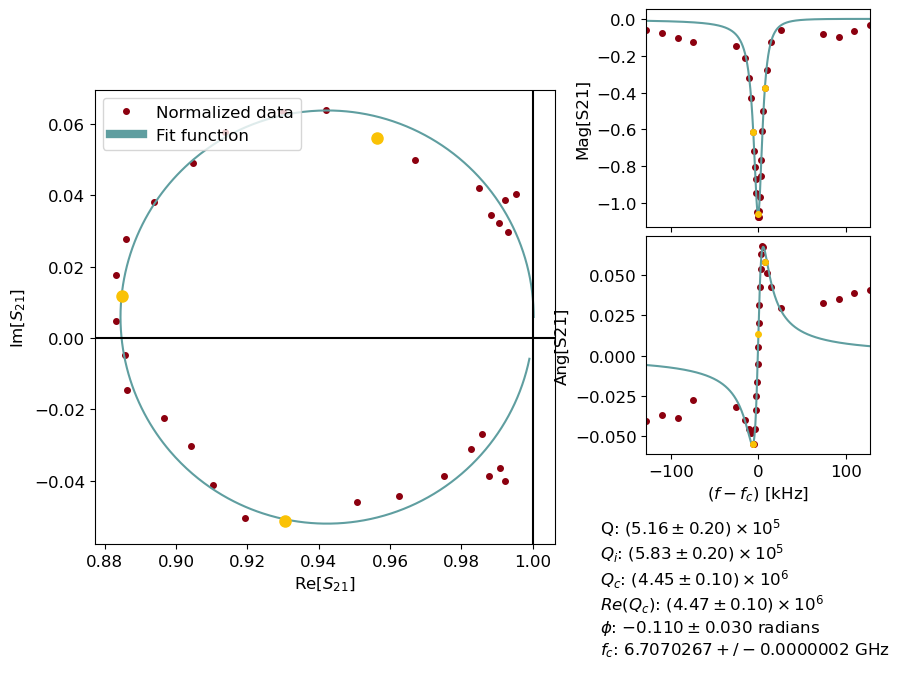

-60.0


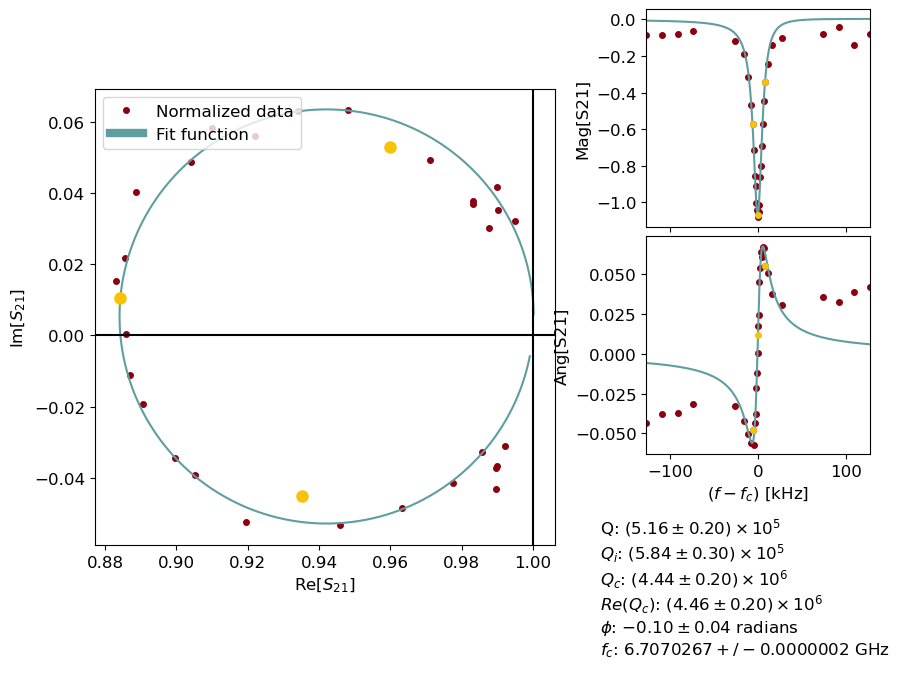

-65.0


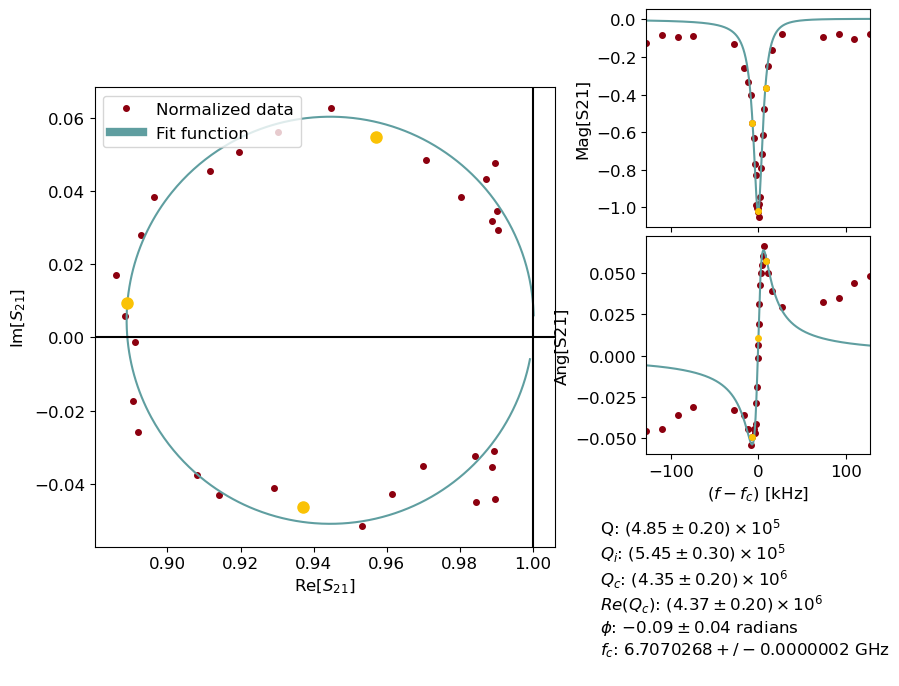

-70.0


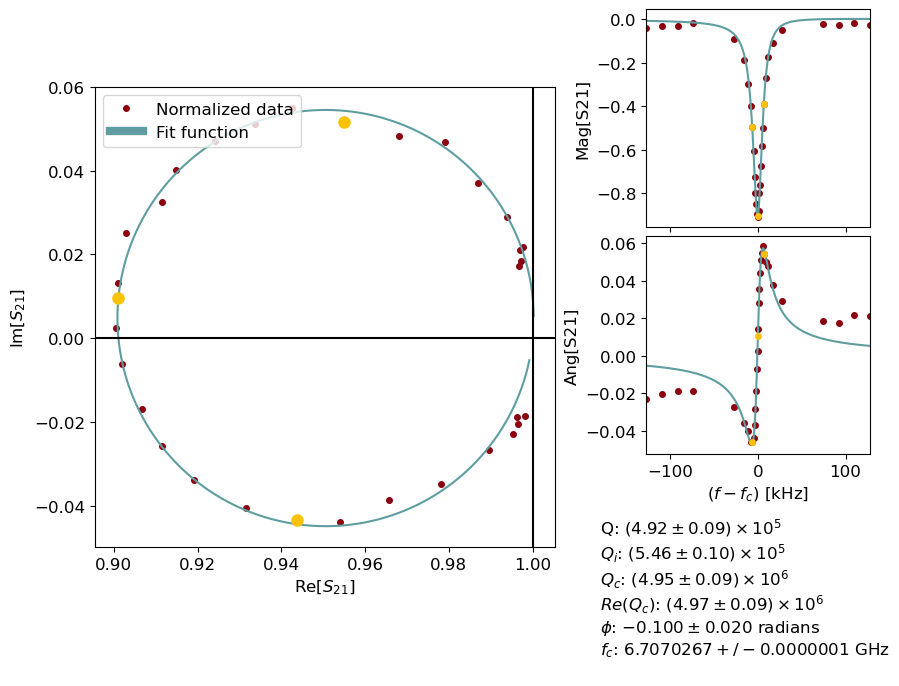

-75.0


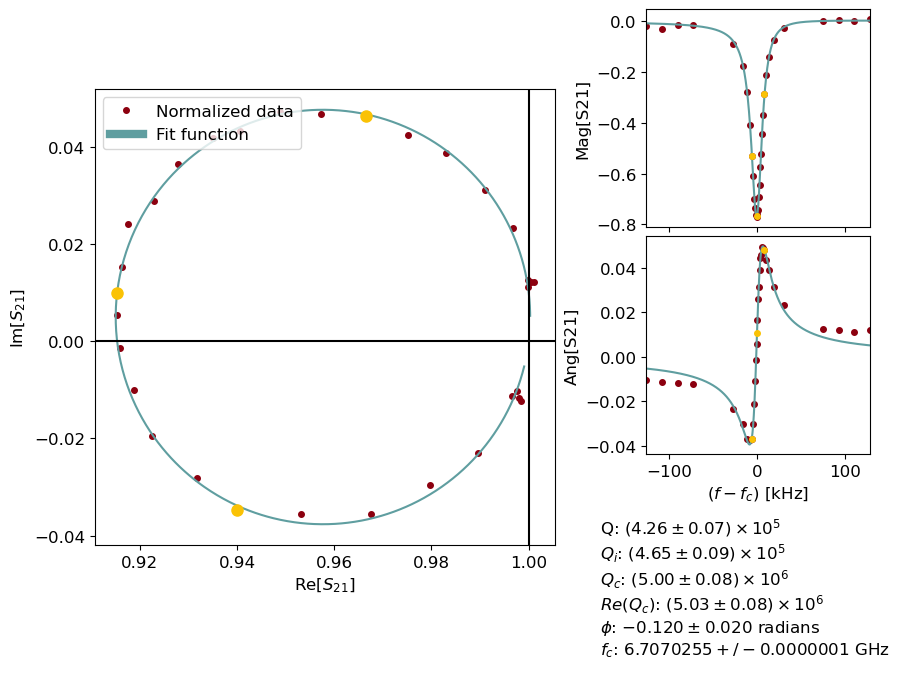

-80.0


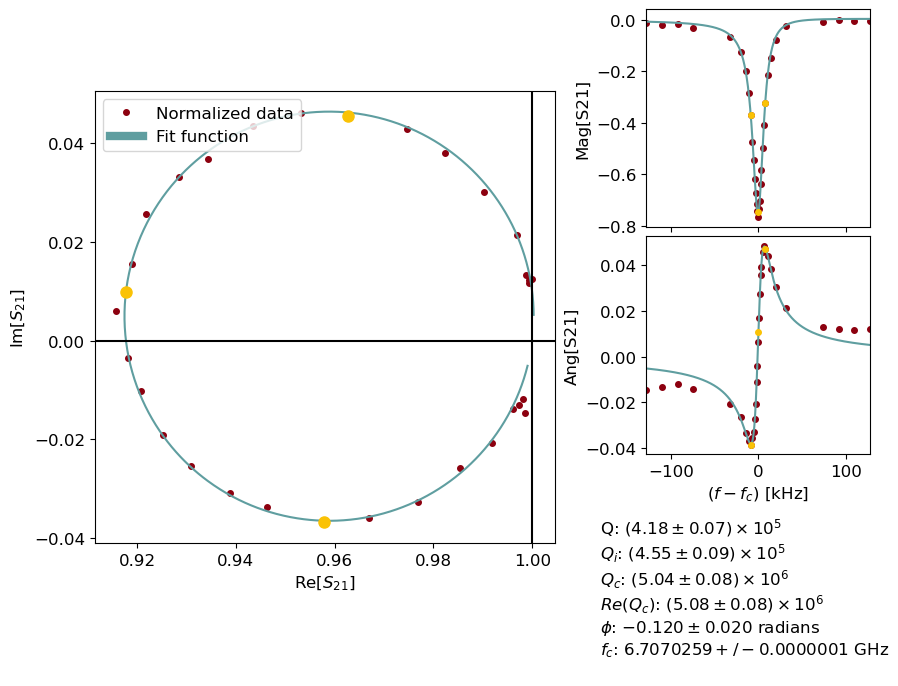

Time elapsed: 206.6335871219635
0.0


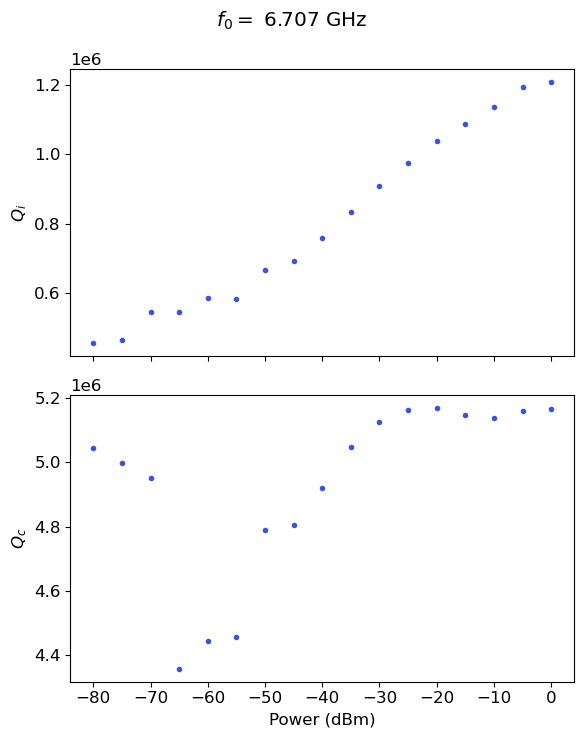

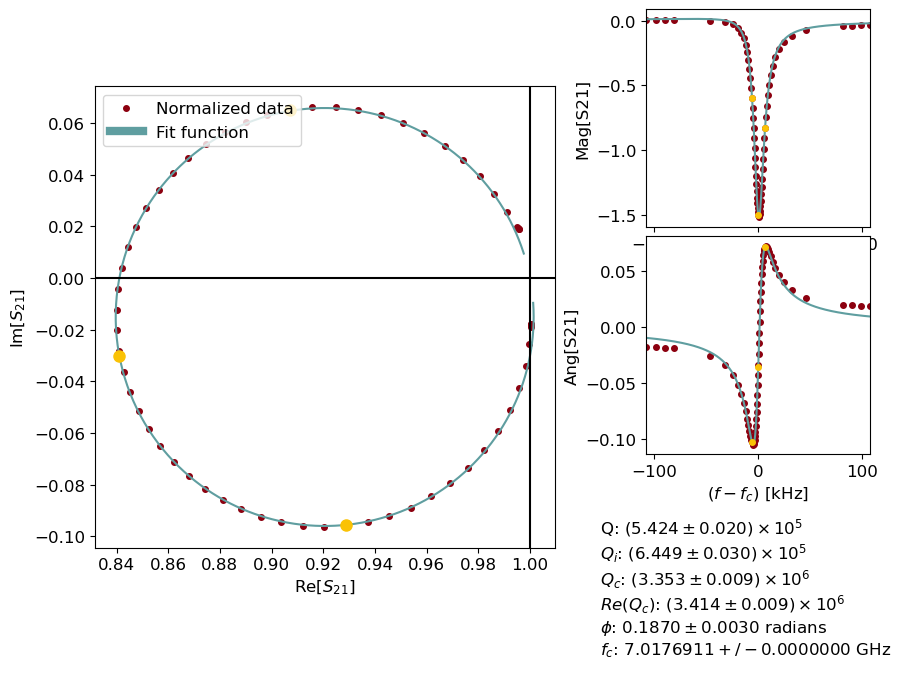

-5.0


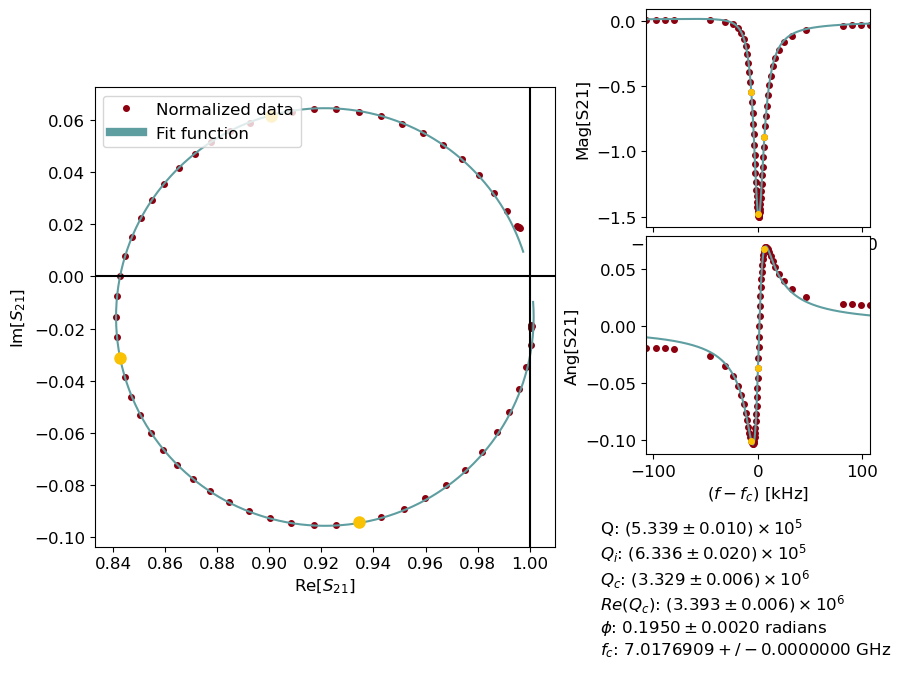

-10.0


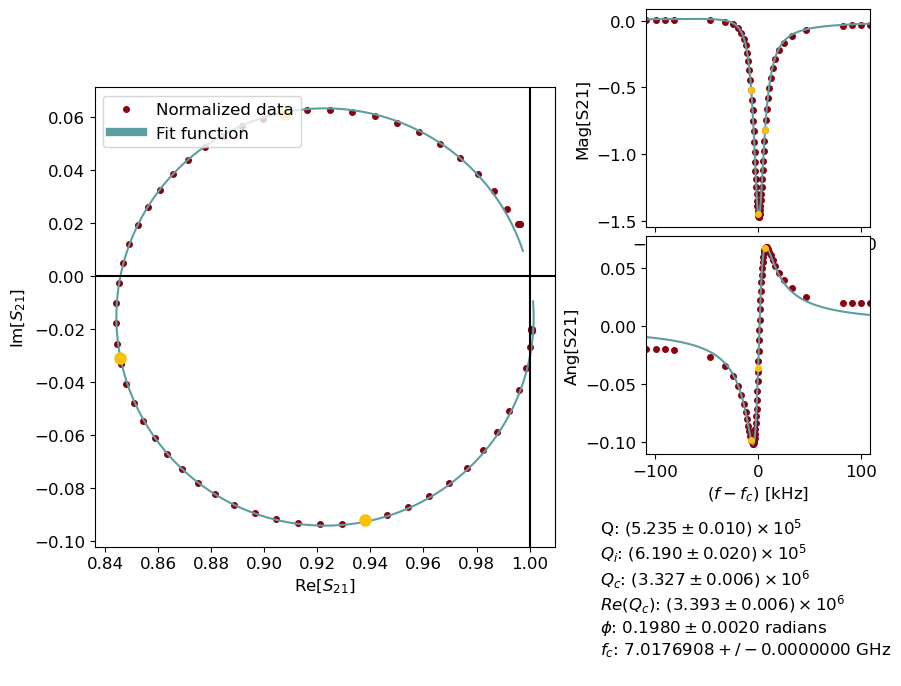

-15.0


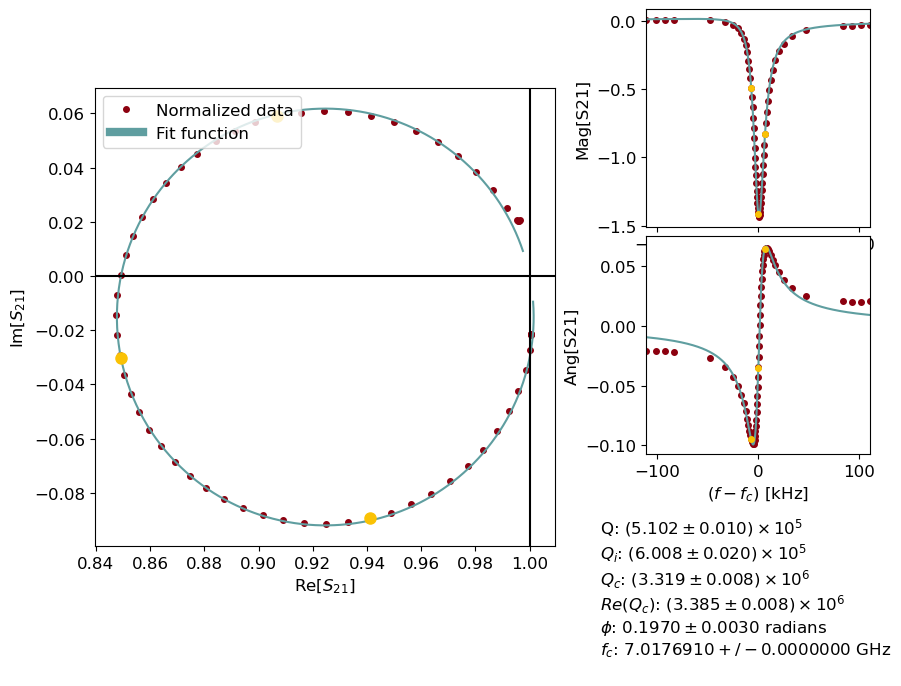

-20.0


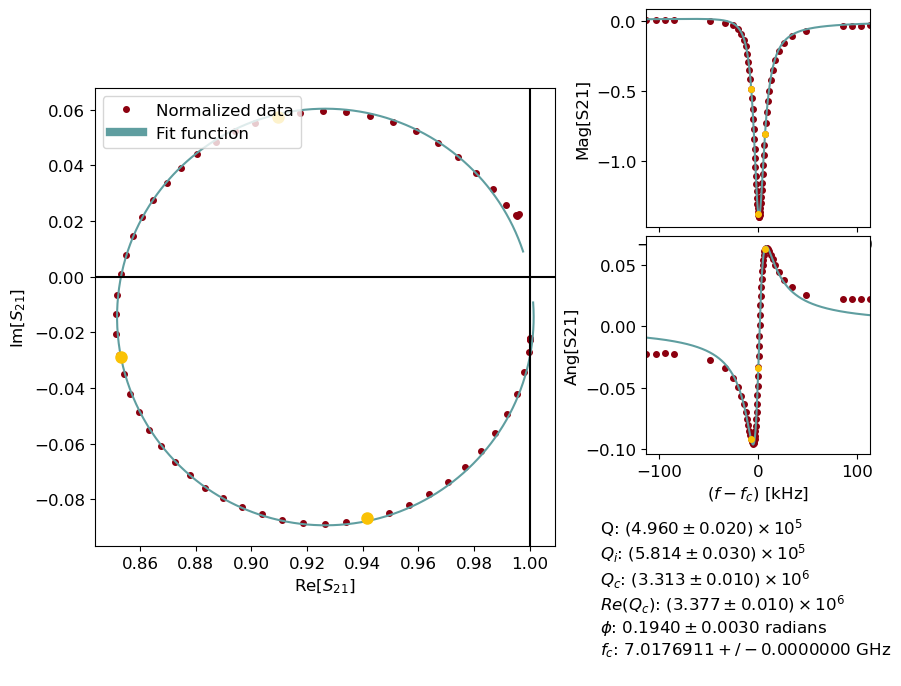

-25.0


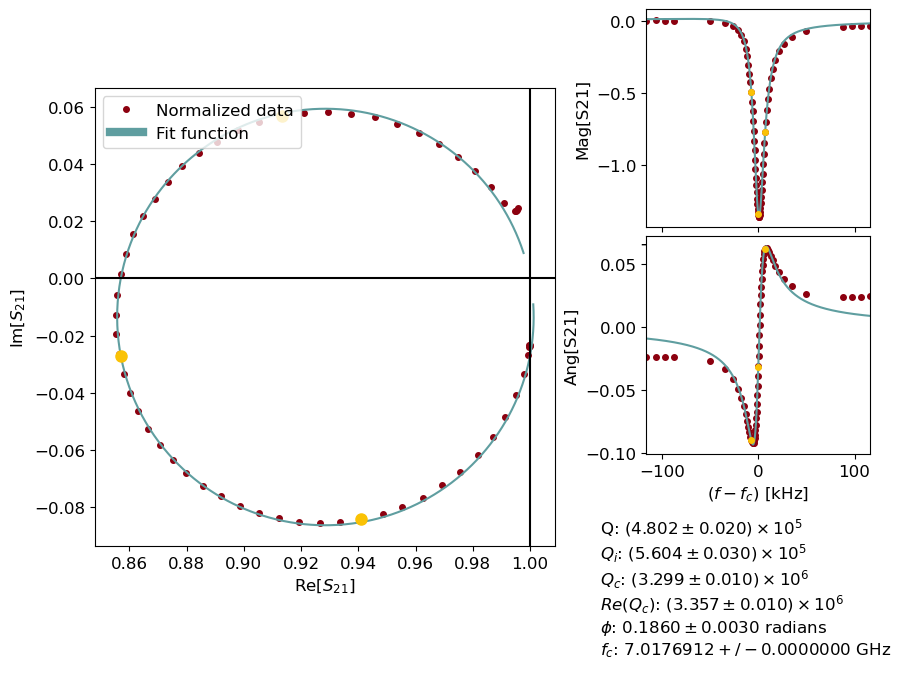

-30.0


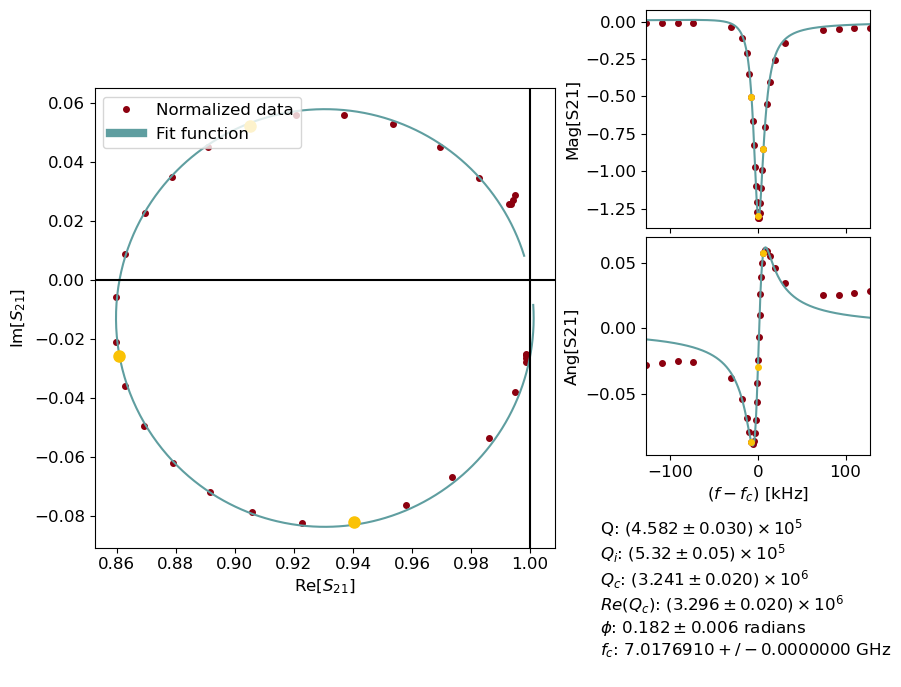

-35.0


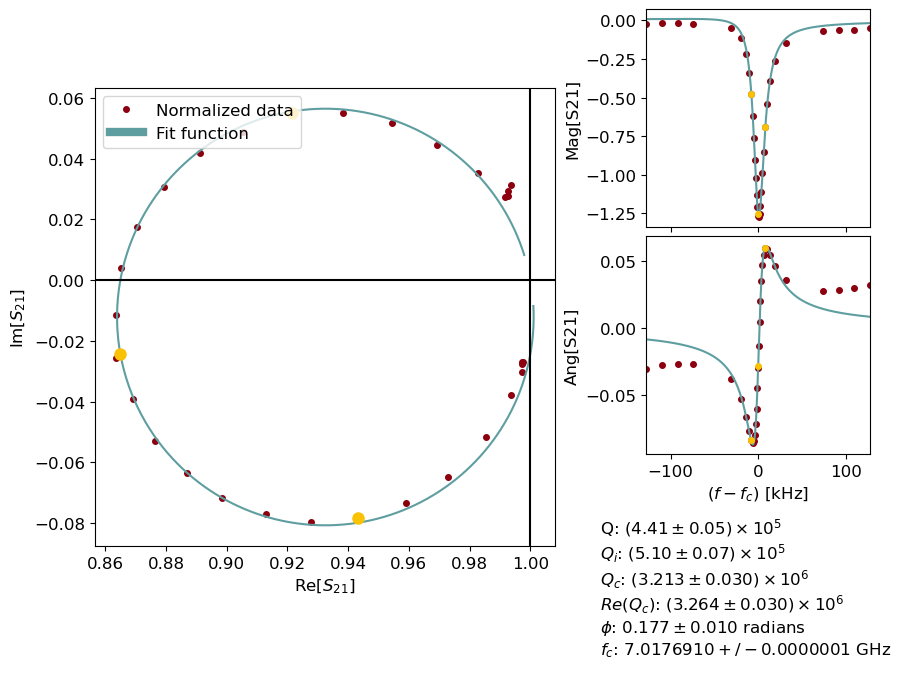

-40.0


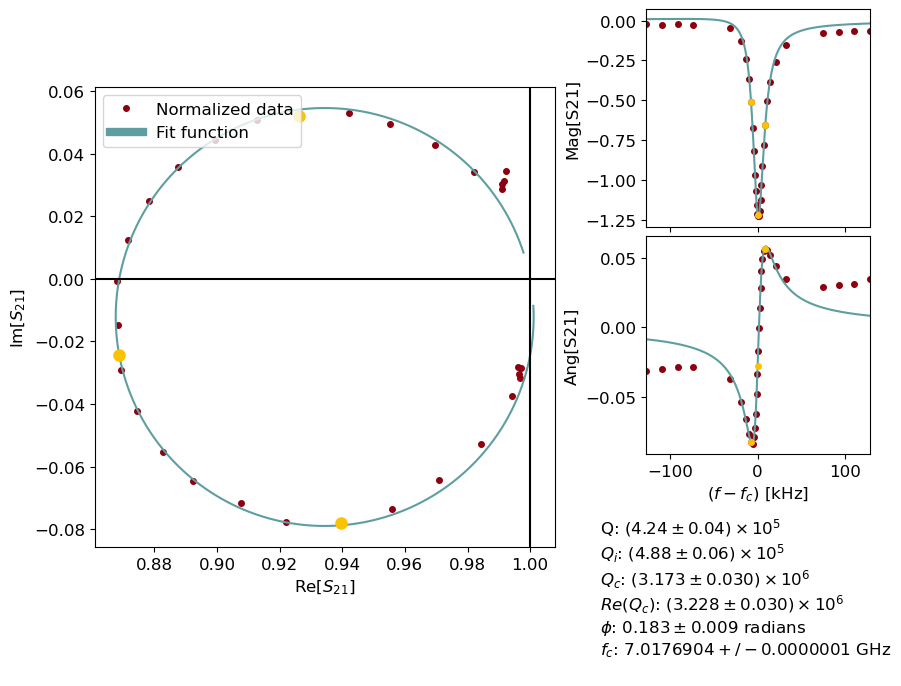

-45.0


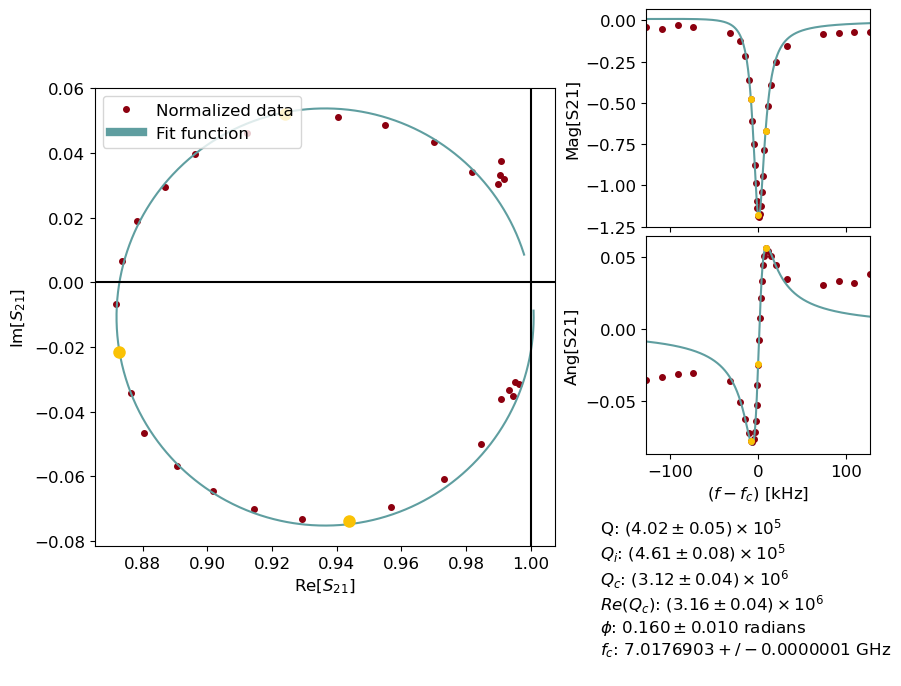

-50.0


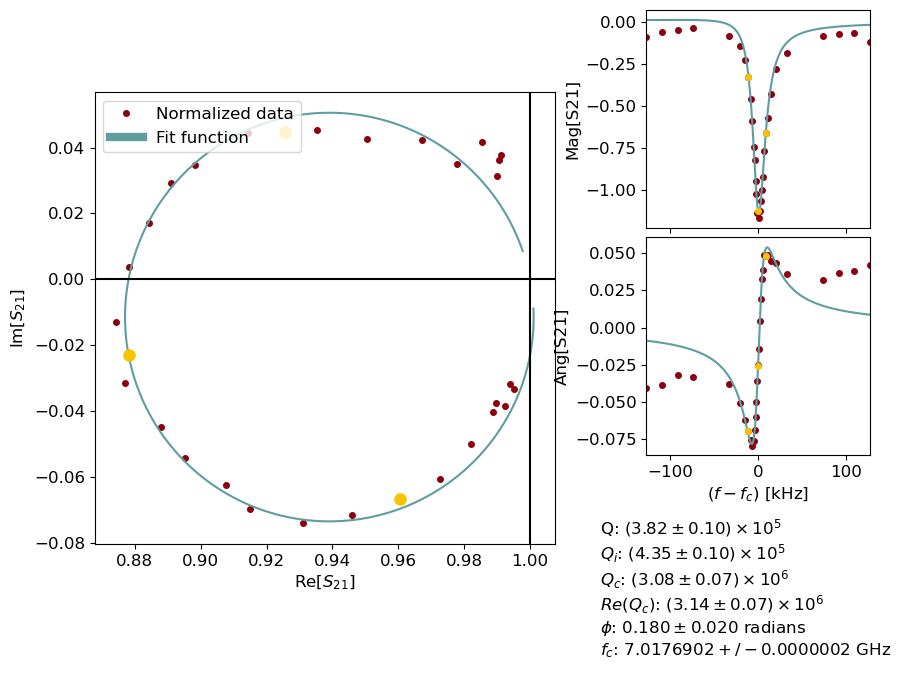

-55.0


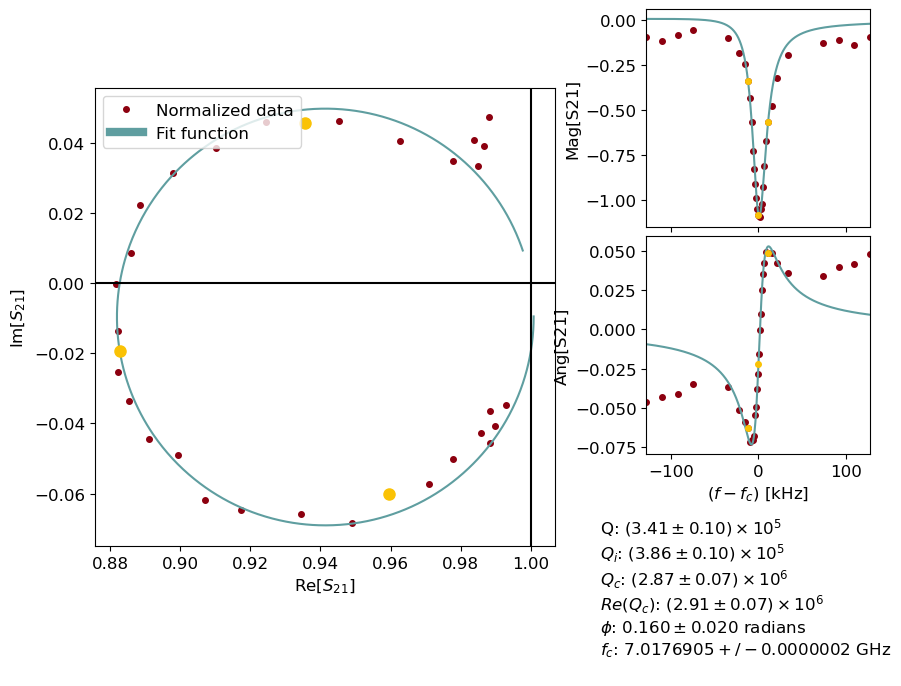

-60.0


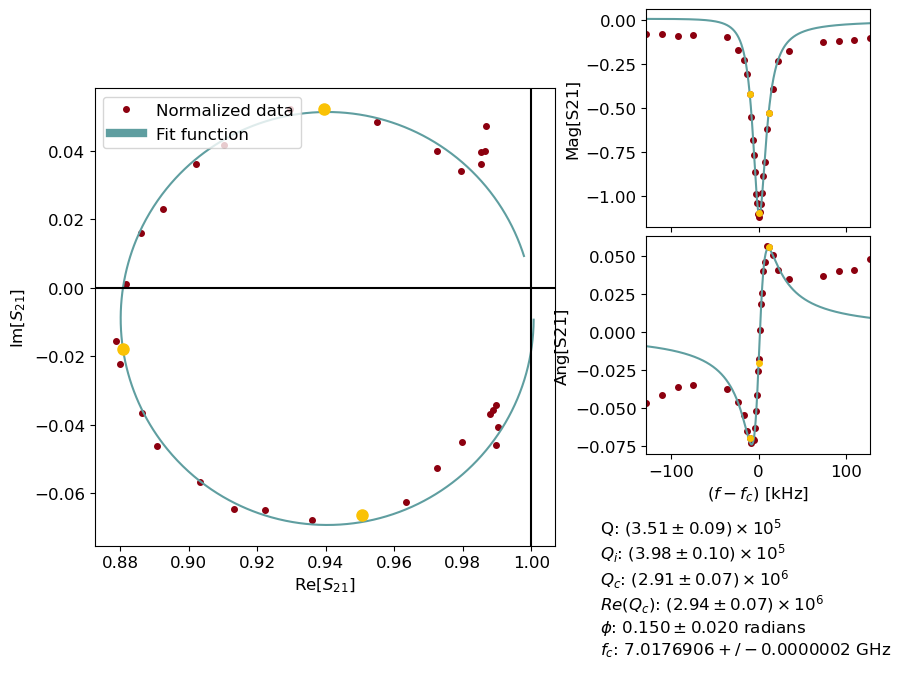

-65.0


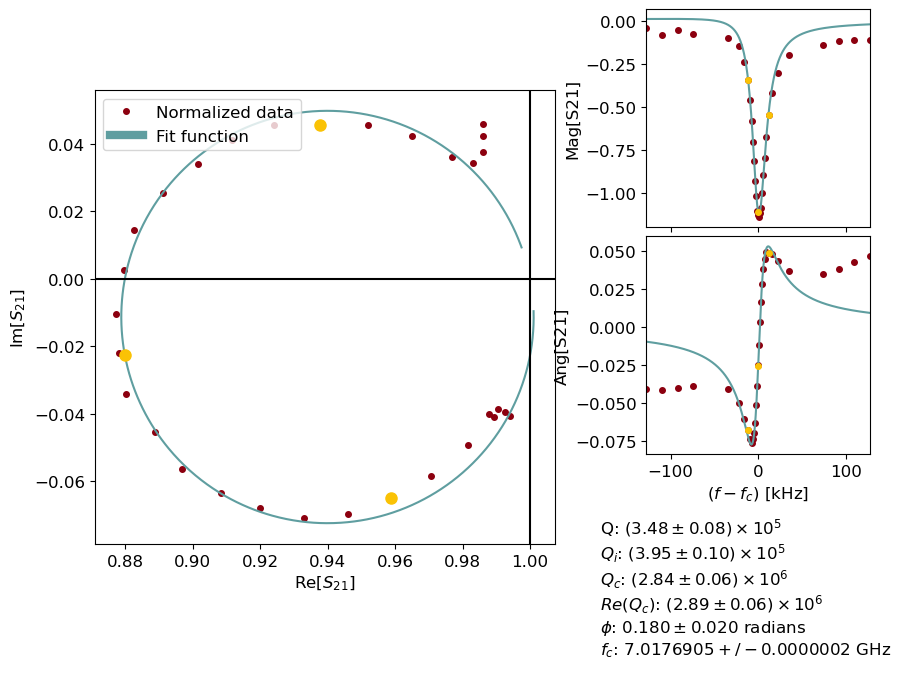

-70.0


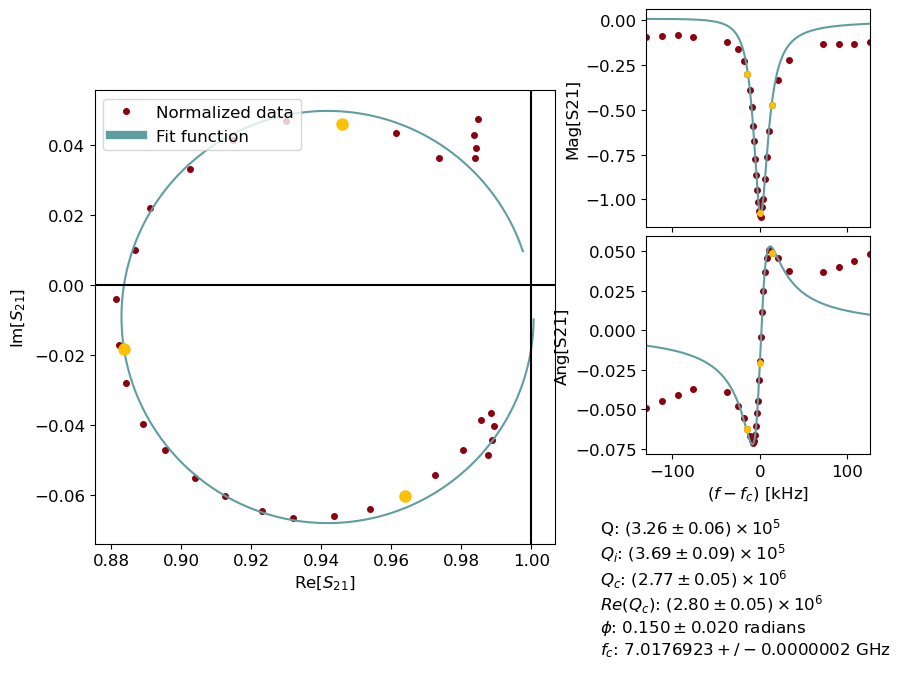

In [ ]:
res_params, file_list = ResonatorAnalyzer.analyze_sweep_gen(
    params['dir'][ind], 
    data_pth, 
    img_pth, 
    name=meas, 
    plot=True, 
    nfiles=params['nfiles'][ind], 
    meas_type=params['meas_type'][ind], 
    slope=slope, 
    fitphase=False
)

In [115]:
#slope=1135.027

%matplotlib inline
frac = 7.714986

# fnames = ResonatorPlotter.plot_all(
#     params['dir'][ind], 
#     data_pth, 
#     output_path=img_pth, 
#     max_power=-15, 
#     min_power=-80, 
#     norm=True, 
#     half_norm=False, 
#     nfiles=params['nfiles'][ind], 
#     meas_type=params['meas_type'][ind],
#     slope=slope, 
#     name=img_name
# )  # slope=slope

In [116]:
#fnames, res_params = ana_res.analyze_sweep_other(params['dir'][ind], data_pth, output_path=img_pth, max_power=-15, nfiles=params['nfiles'][ind], meas_type=params['meas_type'][ind],slope=slope)#, slope=slope)

#### Reorder the data based on pitch (only run once)

In [117]:
if params['meas_type']=='soc':
    res_params = ResonatorAnalyzer.convert_power(res_params) 

params, res_params = ResonatorAnalyzer.reorder(params, res_params)  # only run once!
params['qc'] = np.array([np.nanmedian(res_params[i]['qc']) for i in range(len(res_params))])
params['qc_err'] = np.array([np.nanmedian(res_params[i]['qc_err']) for i in range(len(res_params))])
params['freqs'] = np.array([np.nanmedian(res_params[i]['freqs']) for i in range(len(res_params))])
params['phs'] = np.array([np.nanmedian(res_params[i]['phs']) for i in range(len(res_params))])

In [118]:

with open('res_params.yaml', 'w') as file:
    for i in range(len(res_params)):
        rp = {key: value.tolist() if isinstance(value, np.ndarray) else value for key, value in res_params[0].items()}
        yaml.dump(rp, file)

### Power sweep and TLS fits

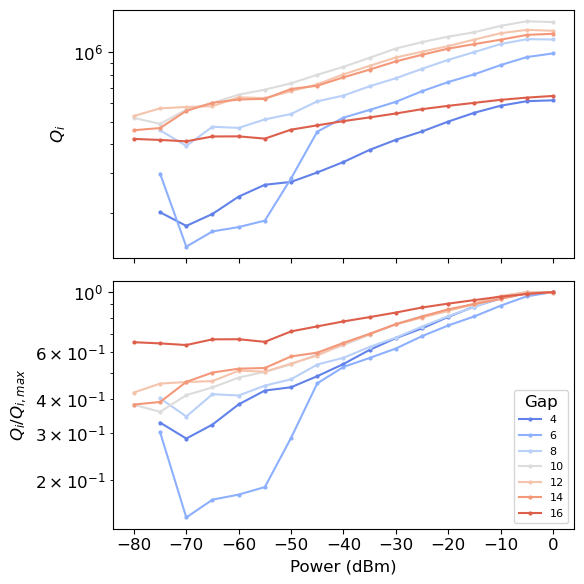

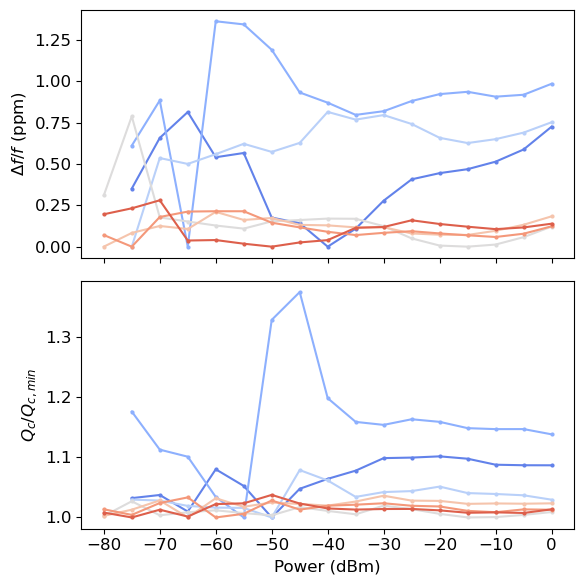

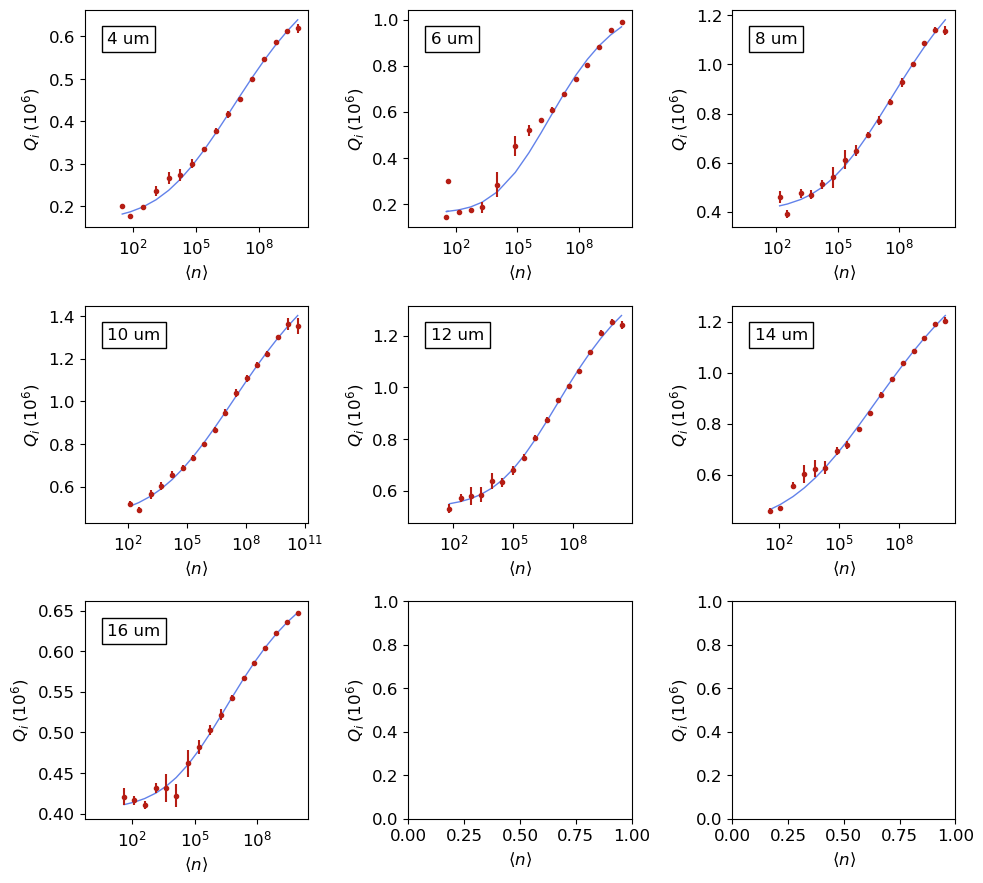

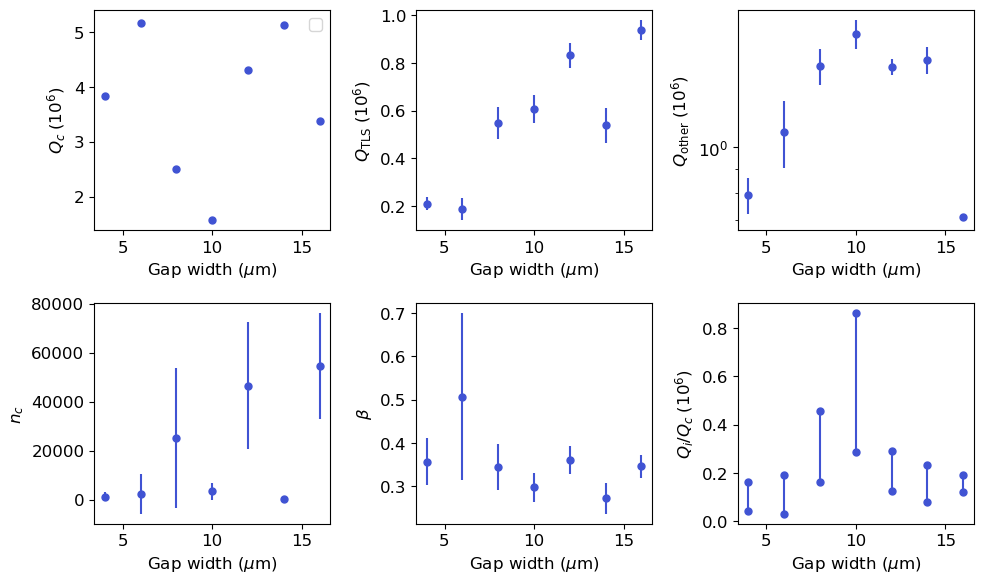

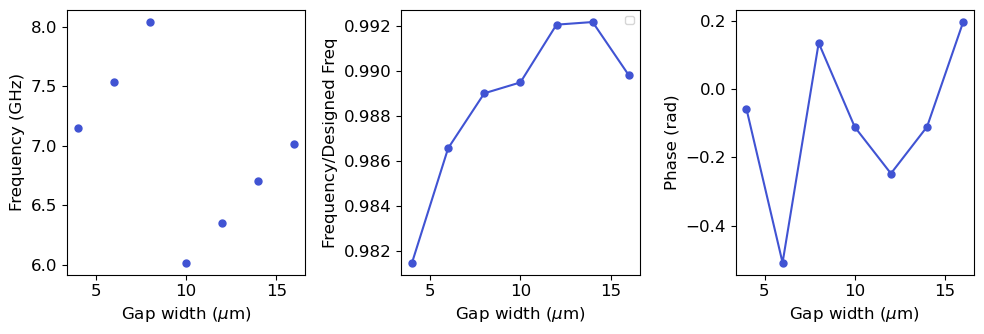

In [119]:
#%matplotlib widget
%matplotlib inline
ResonatorPlotter.plot_power(res_params, params, ind, img_pth, use_pitch=True)

#max_power = [-15, -20, 0, 0,-20, 0, 0, 0]
#max_power = [-15, -35, -5, -5]
max_power =[-5, -15, -35, -5, -5, -15, -15, -5]
#min_power = [-50, -80, -75, -75, -80, -80, -80, -75]
#min_power = [-80, -80, -80, -80, -90, -90, -75, -90]
min_power = [-70, -75, -80, -80, -90, -90, -90, -75]
#cfg = ana_tls.fit_qi(res_params, params, img_pth) 
cfg = ana_tls.fit_qi(res_params, params, img_pth, name=img_name)#, max_power_vec=max_power) 
# params['qtls0'][2] = float('nan')
# params['qother'][2] = float('nan')

ana_tls.plot_res_pars([params], [''],img_pth, name=img_name)
ResonatorPlotter.plot_res_pars([params], [''], img_pth, name=img_name)
hy.save_np(params, img_pth+'Text/' +params['pth'][ind][0:-1] +params['meas'][ind] + '.yml')
#hy.save_np(res_params, img_pth+'Text/' +params['pth'][ind][0:-1] +params['meas'][ind] + '_ph.yml')

In [82]:
params['pitch'] = [14, 4, 6, 8, 10, 2, 12, 16]
params['target_freq'] = [6.76, 7.28, 7.64, 8.13, 6.08, 7.06, 6.4, 7.09]


#res_params2 = copy.deepcopy(res_params)

In [65]:
res_params3 = copy.deepcopy(res_params)

In [66]:
res_params = res_params2 + res_params3

In [69]:
len(res_params)

8

In [ ]:
sns.set_palette('coolwarm',8)
fig, ax= plt.subplots(1,1)
for i in range(len(res_params)):
    ax.plot(res_params[i]['pow'][0],res_params[i]['qc'][0],'.-')

In [ ]:
pitch_list = params['pitch']
qtls0 = params['qtls0']
qtls0_err = params['qtls0_err']
qother = params['qother']
qother_err = params['qother_err']

%matplotlib inline
plt.errorbar(np.array(pitch_list)+0.2, qtls0, yerr = qtls0_err, fmt='.', label = 'Q_TLS0', capsize = 2)
plt.errorbar(pitch_list, qother, yerr = qother_err, fmt='.', label = 'Q_Other', capsize = 2)
plt.xlabel('Pitch size [um]')
plt.legend()
plt.ylim(-0.2*10**6, 1.3*10**6)
plt.show()

### Plot with different max and min power for each resonator 

In [ ]:
if sample == 'hf3':
    max_power = [-40, -50, -35, -40, -25, -25, -25, -25]

    cfg = ana_tls.fit_qi(res_params, params, img_pth, max_power_vec = max_power) 
    ana_tls.plot_res_pars([params], [''],img_pth)
    #params_nohf_low_pow = copy.deepcopy(params)
    params_hf = copy.deepcopy(params)
else:
    max_power = [-35, -35, -15, -25, -15, -15, -15, -15]
    min_power = [-115, -115, -115, -115, -100, -95, -90, -90]
    
    cfg = ana_tls.fit_qi(res_params, params, img_pth, max_power_vec = max_power, min_power_vec = min_power) 
    ana_tls.plot_res_pars([params], [''],img_pth)
    params_no_hf = copy.deepcopy(params)

### Print out info for running scans

In [80]:
lw=[]
freq =[]
print('linewidth')
for i in range(len(params['freqs'])):
    q = 1/(1/params['qi0'][i]+1/params['qc'][i])
    lw.append(params['freqs'][i]/q)
    freq.append(params['freqs'][i])

print(lw)
print(freq)

linewidth
[16785.22458895433, 37905.90980000802, 19969.879358735856, 22915.20007840218, 15014.862176011913, 30350.773022270874, 13573.320304849252, 11421.69583031283]
[6682433192.364843, 7073550920.611762, 7480155508.035926, 7990972560.177475, 5984993567.880161, 6713406660.050961, 6322708396.270203, 6996102012.193269]


{'atten': -50,
 'dir': [['power_sweep_20250307_174853/'], ['power_sweep_20250308_202738/']],
 'flip': True,
 'max_power': 5,
 'meas': ['sil4a1', 'sil4a2'],
 'meas_type': ['vna', 'vna'],
 'min_power': -150,
 'nfiles': [1, 1],
 'slope': [0, 0],
 'pitch': [2, 4, 6, 8, 10, 12, 14, 16],
 'pth': ['250227-ResSil4Y/', '250227-ResSil4A/'],
 'target_freq': [7.06, 7.28, 7.64, 8.13, 6.08, 6.4, 6.76, 7.09],
 'temp': 0.04,
 'qc': array([4841817.1484, 2007358.6533, 3823683.9754, 1235408.1089,
        1345431.6647, 3625954.0484, 4894937.937 , 7486204.869 ]),
 'qc_err': array([ 98730.7615,  68360.2247,  90238.9707,  38476.0802,  19423.1256,
         69116.6675, 101580.4149, 149761.5708]),
 'freqs': array([6.6824e+09, 7.0736e+09, 7.4802e+09, 7.9910e+09, 5.9850e+09,
        6.7134e+09, 6.3227e+09, 6.9961e+09]),
 'phs': array([-0.0482, -0.8491, -0.688 ,  0.7251,  0.0819, -0.4281,  0.2398,
        -0.3993]),
 'qtls0': array([461595.284 , 219556.2054, 648198.0787, 521299.4245, 591485.6138,
                n

In [ ]:
%matplotlib widget
#pnames = ['240814-2','240725','240729-2', '240729-4']
#labs = ['ScalinQ (No HF)', 'SLab (No HF)', 'SLab (HF)', 'RFSoC (HF)'] 

#pnames = ['240729-2', '240729-3']
pnames = ['240729-3', '240820_soc']
labs = ['VNA (HF)', 'RFSoC (HF)'] 
plist =[]
for p in pnames:
    plist.append(hy.load(img_pth +'Text/'+ p + '.yml'))

ana_tls.plot_res_pars(plist, labs,img_pth)
ResonatorPlotter.plot_res_pars(plist, labs,img_pth)

## Single resonators

### Get list of resonators

In [ ]:
# Grab list of resonators following corect format in directory. 

pattern0 = r'res_(\d+)_\d{2,5}dbm'
resonators, file_list0 = ResonatorData.get_resonators(directories[0], pth, pattern0)

pattern = 'res_{:d}_'.format(resonators[0]) + '(\d{2,3})dbm'
file_list = ResonatorData.get_resonator_power_list(pattern, file_list0)

### Fit slope for RFSoC phase correction

In [ ]:
pth = r'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/Data/240816-Resonator'

plt.figure()
data, attrs = hy.prev_data(pth, 'test2')
plt.plot(data['xpts'][0], data['phases'][0])
slope, ofs = np.polyfit(data['xpts'][0], np.unwrap(data['phases'][0]), 1)
data['phases'] = np.unwrap(data['phases'][0]) - slope * data['xpts'][0]-ofs

print(slope)

data['phases']

In [ ]:
# Grab list of resonators following corect format in directory. 

pth = r'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/Data/240818-Resonator/'

#directories = ['240816-Resonator/powersweep3']
directories = ['powersweep2']
pattern0 = r'res_(\d+)_\d'
resonators, file_list = ResonatorData.get_resonators(directories[0], pth, pattern0)

In [ ]:
params['dir'][0][0]

In [ ]:
data_pth + params['dir'][0][0],file_list[0][0][-1]

In [ ]:
data, attrs = hy.prev_data(data_pth + params['dir'][0][0],file_list[4][0][-1])


In [ ]:
file_list[0][7][-1]

In [ ]:
data, attrs = ResonatorData.grab_data(data_pth+params['dir'][0][0], file_list[0][0][-1], 'vna')
#ResonatorPlotter.plot_raw_data(data)

data, attrs = hy.prev_data(path, fname)

# Reformat data for scres package
data["phases"] = np.unwrap(data["phases"][0])
#data["phases"] = ResonatorData.check_phase(data["phases"])
data["freqs"] = data["fpts"][0]
data["amps"] = data["mags"][0]
output = ResonatorFitter.fit_resonator(data,  file_list[0][0][-1], img_pth, plot=True)

In [ ]:
import os
file_list[0]
fname =  'res_6423_4096_wideright'
data, attrs = hy.prev_data(pth+directories[0], fname)

data.keys()
files = os.listdir('C:\\_python\\')
print(files)

Single resonator

In [ ]:
data, attrs = ResonatorData.grab_data(pth+directories[0], file_list[4], 'soc', slope=slope)
#ResonatorPlotter.plot_raw_data(data)
output = ResonatorFitter.fit_resonator(data, fname, img_pth, plot=True)   

In [ ]:
sorted_file_list = sorted(file_list)
print(sorted_file_list)

In [ ]:
file_list[12]

In [ ]:
%matplotlib widget

for i in range(len(file_list)):
    #try:
    data, attrs = ResonatorData.grab_data(pth+directories[0], file_list[i])       
    ResonatorPlotter.plot_raw_data(data)
    #output = ResonatorFitter.fit_resonator(data, file_list[i], output_path, 'png')    
    #except: 
    #    print('fit failed')  

In [ ]:
7.714986

In [ ]:
pth = '../../../../JJ_fab/Coherence Sample/Resonators Measurement/240725/data/power_sweep5'
fname = 'res_7083855_60dbm_wide'
data, attrs = ResonatorData.grab_data(pth, fname)
output = ResonatorFitter.fit_resonator(data, fname, img_pth, plot=True)   
ResonatorPlotter.plot_raw_data(data)

## Temp sweep

In [ ]:
# Initialize the directories list for a temperature sweep 
temps, directories = ResonatorData.get_temp_list(pth_base, max_temp=1500)
res_params = ResonatorAnalyzer.analyze_sweep_gen(directories, base_path, img_path)

ResonatorPlotter.plot_power_temp(res_params, i, params, img_pth)